In [1]:
# *******************************************************************************************************************************************
# Titel: Exempel på olika diagramtyper i R 
# Beskrivning: Illustrera xx identifierade diagramtyper i R med separata scriptdelar
# Skapad av: Frank Weideskog(frank.weideskog@scb.se), ID: SCBFRWE
# 2024-04-08 (SCBFRWE):En första version 
# 2024-04-26 (SCBFRWE):version 2 (tillägg av upprogrammerade kompletterade R-base exempel för de paket som inte fungerar i Balsam just nu)
#********************************************************************************************************************************************
# Rensar minnet i R
rm(list=ls())					
# ******************************************************************************************************************************************
#Installerar/aktiverar relevanta R-paket (R-packages):
#Eftersom det här handlar om flera olika scriptdelar installeras/aktiveras relevanta paket i varje delscript

#*******************************************************************************************************************************************

[1] "Denna kod skapar en enkel boxplot med fiktiva data. Den första delen av koden skapar data med tre grupper (A, B och C) och slumpmässiga värden. Sedan används funktionen boxplot() för att skapa själva boxplotten. Value Group anger att vi vill skapa en boxplot baserad på värdet i variabeln Value och grupperna i variabeln Group. Parametrarna main, xlab och ylab används för att lägga till en titel och etiketter på axlarna för att förtydliga diagrammet."

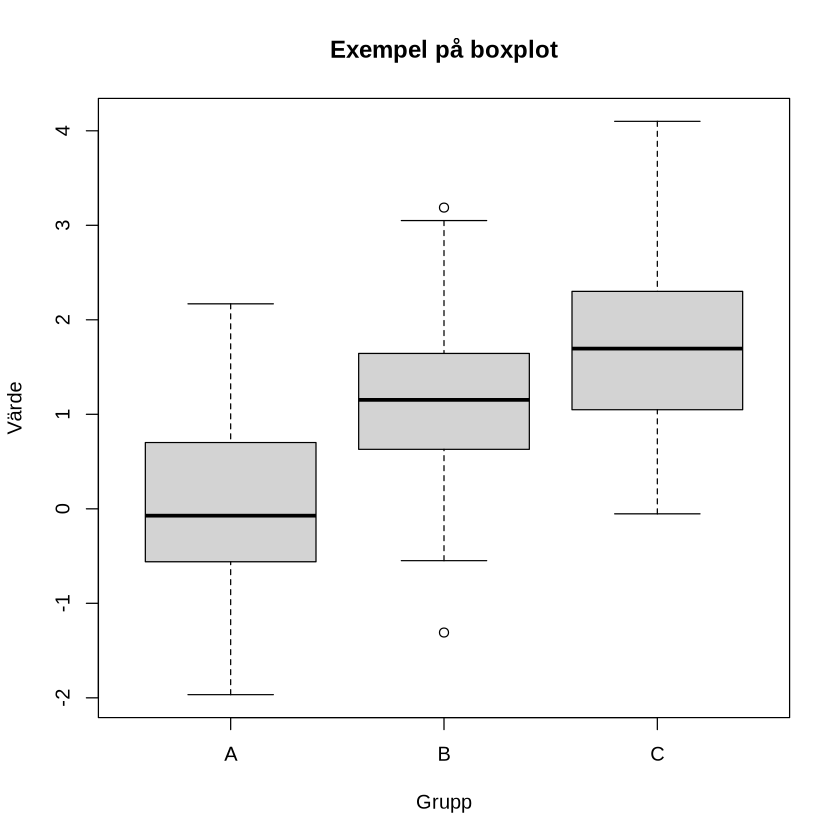

In [2]:
#BOXPLOT

set.seed(123)
data <- data.frame(
  Group = rep(c("A", "B", "C"), each = 50),
  Value = c(rnorm(50), rnorm(50, mean = 1), rnorm(50, mean = 2))
)

#Test
# Skapa boxplot
boxplot(Value ~ Group, data = data, 
        main = "Boxplot",
        xlab = "Grupp",
        ylab = "Värde")


text<- 'Denna kod skapar en enkel boxplot med fiktiva data. Den första delen av koden skapar data med tre grupper (A, B och C) och slumpmässiga värden. Sedan används funktionen boxplot() för att skapa själva boxplotten. Value Group anger att vi vill skapa en boxplot baserad på värdet i variabeln Value och grupperna i variabeln Group. Parametrarna main, xlab och ylab används för att lägga till en titel och etiketter på axlarna för att förtydliga diagrammet.'
text

[1] "Detta kodavsnitt skapar en bubbelplott (mtcars) där variablerna wt (vikt) och mpg (miles per gallon) är på x- respektive y-axeln. Storleken på bubblorna representeras av variabeln hp (hästkrafter) och färgen på bubblorna indikerar antalet cylindrar. Bubblornas transparens är satt till 0,7 för att underlätta visualiseringen av överlappande punkter."

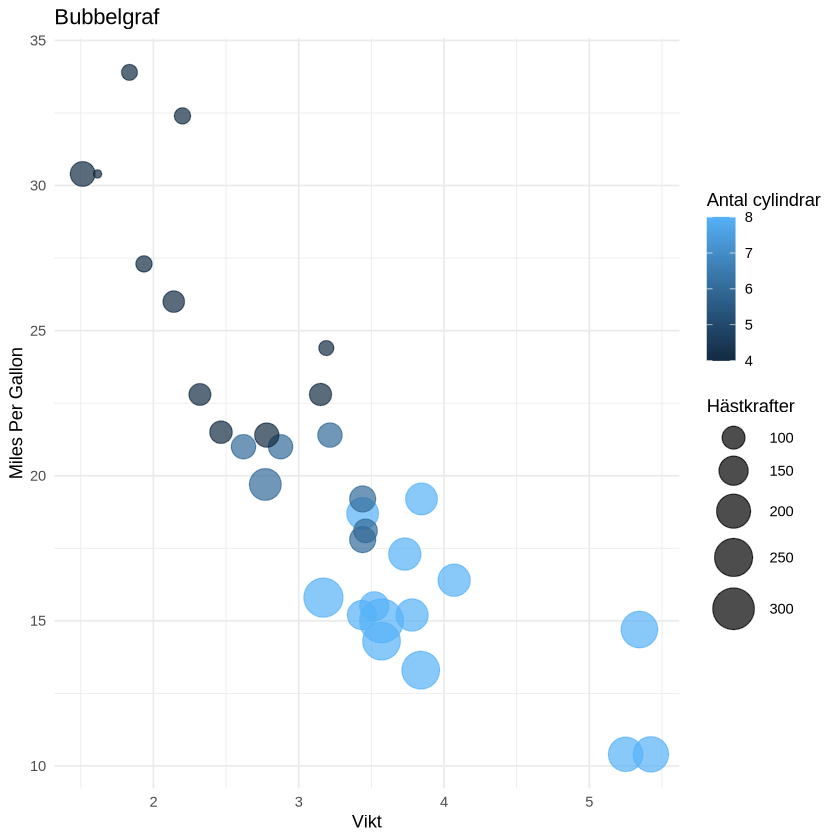

In [8]:
#BUBBELGRAF

# Ladda in nödvändiga paket
library(ggplot2)

# Skapa ett bubbeldiagram med mtcars-dataseten
ggplot(mtcars, aes(x = wt, y = mpg, size = hp, color = cyl)) +
  geom_point(alpha = 0.7) +
  scale_size_continuous(range = c(2, 12)) +
  labs(x = "Vikt", y = "Miles Per Gallon", size = "Hästkrafter", color = "Antal cylindrar") +
  ggtitle("Bubbelgraf") + # Lägg till titel här
  theme_minimal()

text <- 'Detta kodavsnitt skapar en bubbelplott (mtcars) där variablerna wt (vikt) och mpg (miles per gallon) är på x- respektive y-axeln. Storleken på bubblorna representeras av variabeln hp (hästkrafter) och färgen på bubblorna indikerar antalet cylindrar. Bubblornas transparens är satt till 0,7 för att underlätta visualiseringen av överlappande punkter.'
text


[1] "Detta kodavsnitt skapar ett burndown-diagram där datum representerar datumet från start till slut av projektet, planerad representerar den planerade mängden arbete och faktisk representerar den faktiska mängden arbete som återstår vid varje datum. Diagrammet visar både planerat och faktiskt arbete för att jämföra hur väl projektet går enligt plan."

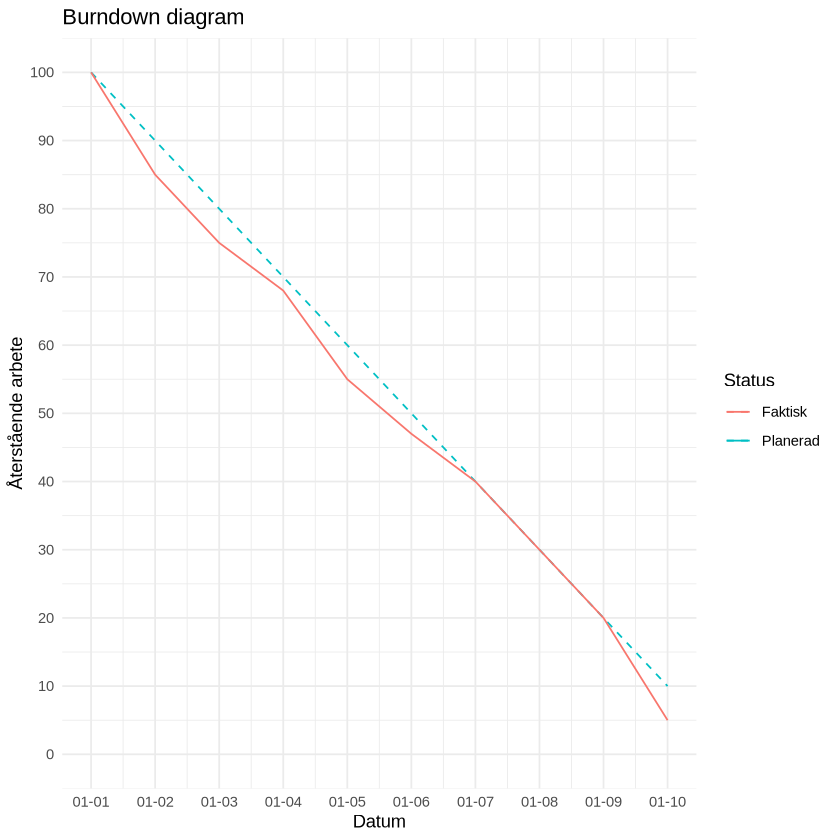

In [9]:
#BURNDOWN CHART

# Ladda in nödvändiga paket
library(ggplot2)

# Skapa data för burndown-diagrammet
datum <- seq(as.Date("2024-01-01"), as.Date("2024-01-10"), by = "days")
planerad <- c(100, 90, 80, 70, 60, 50, 40, 30, 20, 10)
faktisk <- c(100, 85, 75, 68, 55, 47, 40, 30, 20, 5)
data <- data.frame(Datum = datum, Planerad = planerad, Faktisk = faktisk)

# Skapa burndown-diagrammet
ggplot(data, aes(x = Datum)) +
  geom_line(aes(y = Planerad, color = "Planerad"), linetype = "dashed") +
  geom_line(aes(y = Faktisk, color = "Faktisk")) +
  labs(x = "Datum", y = "Återstående arbete", color = "Status") +
  scale_x_date(date_breaks = "1 day", date_labels = "%m-%d") +
  scale_y_continuous(limits = c(0, max(planerad)), breaks = seq(0, max(planerad), by = 10)) +
  ggtitle("Burndown diagram") + # Lägg till titel här
  theme_minimal()

text <- 'Detta kodavsnitt skapar ett burndown-diagram där datum representerar datumet från start till slut av projektet, planerad representerar den planerade mängden arbete och faktisk representerar den faktiska mängden arbete som återstår vid varje datum. Diagrammet visar både planerat och faktiskt arbete för att jämföra hur väl projektet går enligt plan.'
text


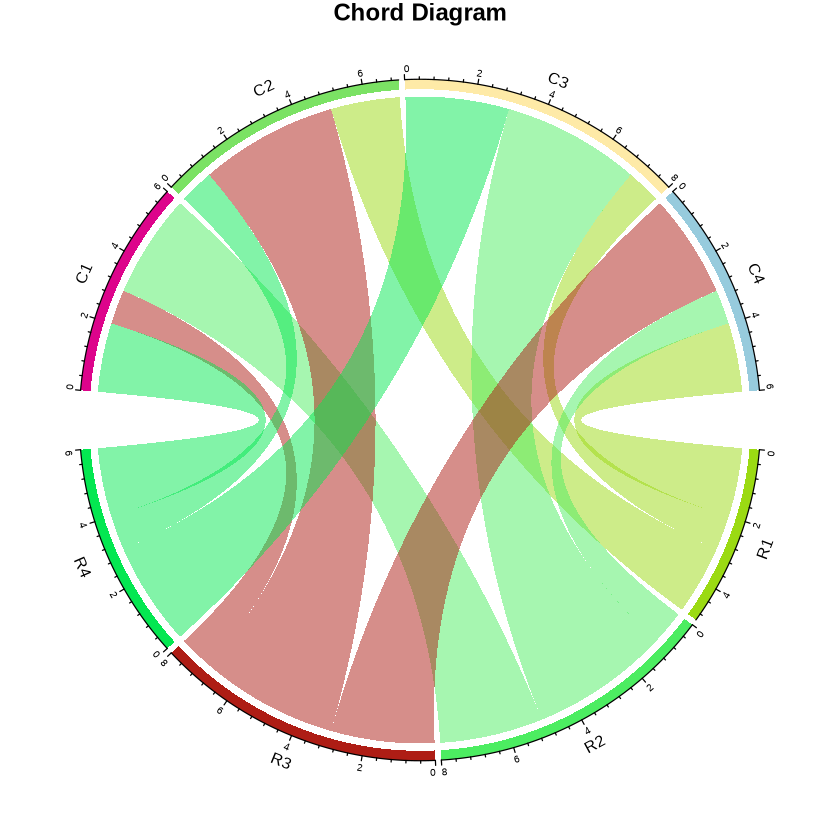

In [7]:
#CHORD DIAGRAM

# Dölj varningsmeddelanden och meddelanden vid start av paket
suppressWarnings({
  suppressMessages({
    #Installerar relevanta R-paket (R-packages):
    install.packages("circlize")
    library(circlize)
  })
  
  # Skapa en matris som representerar förbindelser mellan olika kategorier
  mat <- matrix(c(0, 3, 1, 2, 2, 0, 4, 1, 1, 4, 0, 3, 2, 1, 3, 0), ncol = 4)
  
  # Skapa chord diagram
  chordDiagram(mat, transparency = 0.5)
  
  text <- 'Ett chord diagram är en typ av cirkulär datavisualisering som används för att visa förbindelser och flöden mellan olika kategorier eller grupper. Det består av en cirkel, där varje kategori representeras av en båge längs cirkelns omkrets. Förbindelser mellan kategorierna visas som band som böjer sig mellan motsvarande bågar. I ett chord diagram representeras varje kategori av en sektor längs cirkelns omkrets. Förbindelserna mellan kategorierna visas som band (chords) som ansluter de motsvarande sektorerna. Bandens tjocklek eller färg kan användas för att ange styrkan eller kvantiteten för förbindelserna. Chord diagram är användbara för att visualisera relationer och flöden mellan olika enheter eller grupper. De används ofta för att visualisera nätverk, relationer mellan olika enheter, flöden av resurser eller information, och mycket mer.'
  text
  
  # Lägg till titel
  title("Chord Diagram", cex = 2) # "cex" justerar textstorleken
})


[1] "Detta kodavsnitt skapar ett cirkeldiagram där varje kategori representeras av en del av cirkeln baserat på dess procentandel.Färgerna för varje kategori väljs från färgpaletten \"Set3\". Texten med procentandel placeras i mitten av varje sektor för att tydligt visa fördelningen."

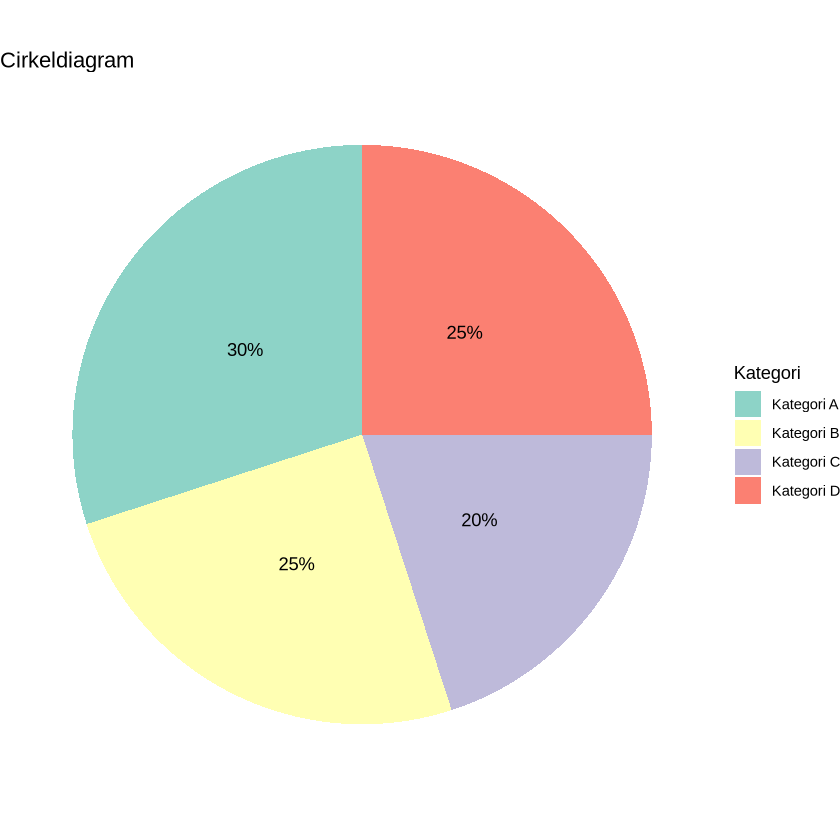

In [10]:
#CIRKELDIAGRAM


# Ladda in nödvändiga paket
library(ggplot2)

# Skapa data för cirkeldiagrammet
data <- data.frame(
  Kategori = c("Kategori A", "Kategori B", "Kategori C", "Kategori D"),
  Procentandel = c(30, 25, 20, 25)
)

# Skapa cirkeldiagrammet
ggplot(data, aes(x = "", y = Procentandel, fill = Kategori)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "right") +
  scale_fill_brewer(palette = "Set3") +
  geom_text(aes(label = paste0(Procentandel, "%")), position = position_stack(vjust = 0.5)) +
  labs(title = "Cirkeldiagram")

text<- 'Detta kodavsnitt skapar ett cirkeldiagram där varje kategori representeras av en del av cirkeln baserat på dess procentandel.Färgerna för varje kategori väljs från färgpaletten "Set3". Texten med procentandel placeras i mitten av varje sektor för att tydligt visa fördelningen.'
text

$title
[1] "Cirkulärt stapeldiagram"

attr(,"class")
[1] "labels"

Warning message:
“Removed 2 rows containing missing values (`geom_text()`).”


[1] "Det genererade cirkulära stapeldiagrammet visualiserar fördelningen av värden för olika grupper över flera observationer.Genom att använda denna cirkulära layout kan man tydligt jämföra fördelningen av värden mellan olika grupper och observationer runt om i cirkeln. Det ger också en estetiskt tilltalande presentation av data som kan vara mer engagerande och lätt att förstå än traditionella stapeldiagram.Varje stapel representerar värdet för en specifik observation (eller individ) inom en viss grupp. Höjden på staplarna motsvarar värdet för den observationen. Varje stapel är färgkodad enligt vilken observationstyp den tillhör. Färgerna ger en visuell identifiering av vilken observationstyp varje stapel representerar. Varje stapel har dessutom en etikett som visar namnet på den individ som observationen representerar. Etiketterna är placerade ovanpå staplarna och är vinklade för att vara lättlästa längs cirkeln. Baslinjer och skalor längs cirkeln används för att indikera gruppernas gränser och värdena längs cirkeln. Detta ger en referenspunkt för att förstå varje grupp och dess relativa storlek längs cirkeln."

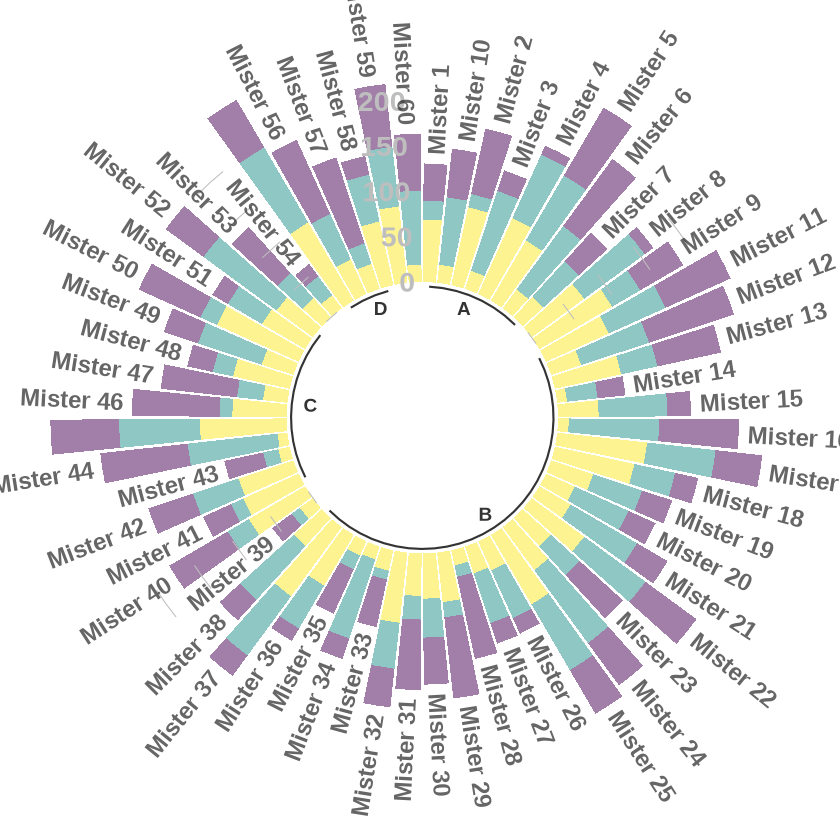

In [45]:
# Cirkulärt stapeldiagram

# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressMessages({
    #Installerar relevanta R-paket (R-packages):
    install.packages("tidyverse")
    library(tidyverse)
    install.packages("viridis")
    library(viridis)
  })

# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value1=sample( seq(10,100), 60, replace=T),
  value2=sample( seq(10,100), 60, replace=T),
  value3=sample( seq(10,100), 60, replace=T)
)

# Transform data in a tidy format (long format)
data <- data %>% gather(key = "observation", value="value", -c(1,2)) 

# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- nlevels(as.factor(data$observation))
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group)*nObsType, ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar*nObsType )
data <- rbind(data, to_add)
data <- data %>% arrange(group, individual)
data$id <- rep( seq(1, nrow(data)/nObsType) , each=nObsType)

# Get the name and the y position of each label
label_data <- data %>% group_by(id, individual) %>% summarize(tot=sum(value), .groups = "drop")
label_data <- label_data %>% na.omit()

number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)

# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]

# Make the plot
p <- ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=as.factor(id), y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend = 50), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 150, xend = start, yend = 150), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 200, xend = start, yend = 200), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  ggplot2::annotate("text", x = rep(max(data$id),5), y = c(0, 50, 100, 150, 200), label = c("0", "50", "100", "150", "200") , color="grey", size=6 , angle=0, fontface="bold", hjust=1) +
  
  ylim(-150,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  
  # Add labels on top of each bar
  geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE) 

p

text<- 'Det genererade cirkulära stapeldiagrammet visualiserar fördelningen av värden för olika grupper över flera observationer.Genom att använda denna cirkulära layout kan man tydligt jämföra fördelningen av värden mellan olika grupper och observationer runt om i cirkeln. Det ger också en estetiskt tilltalande presentation av data som kan vara mer engagerande och lätt att förstå än traditionella stapeldiagram.Varje stapel representerar värdet för en specifik observation (eller individ) inom en viss grupp. Höjden på staplarna motsvarar värdet för den observationen. Varje stapel är färgkodad enligt vilken observationstyp den tillhör. Färgerna ger en visuell identifiering av vilken observationstyp varje stapel representerar. Varje stapel har dessutom en etikett som visar namnet på den individ som observationen representerar. Etiketterna är placerade ovanpå staplarna och är vinklade för att vara lättlästa längs cirkeln. Baslinjer och skalor längs cirkeln används för att indikera gruppernas gränser och värdena längs cirkeln. Detta ger en referenspunkt för att förstå varje grupp och dess relativa storlek längs cirkeln.'
text
  

[1] "I det här exemplet skapar vi ett diagram med korsmönster. Man kan justera egenskaper som mönstervinkel, densitet och avstånd mellan linjerna genom att ändra parametrarna pattern_angle, pattern_density och pattern_spacing."

Warning message in install.packages("ggpattern"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggpattern"):
“installation of package ‘sf’ had non-zero exit status”
Warning message in install.packages("ggpattern"):
“installation of package ‘gridpattern’ had non-zero exit status”
Warning message in install.packages("ggpattern"):
“installation of package ‘ggpattern’ had non-zero exit status”


ERROR: Error in library(ggpattern): there is no package called ‘ggpattern’


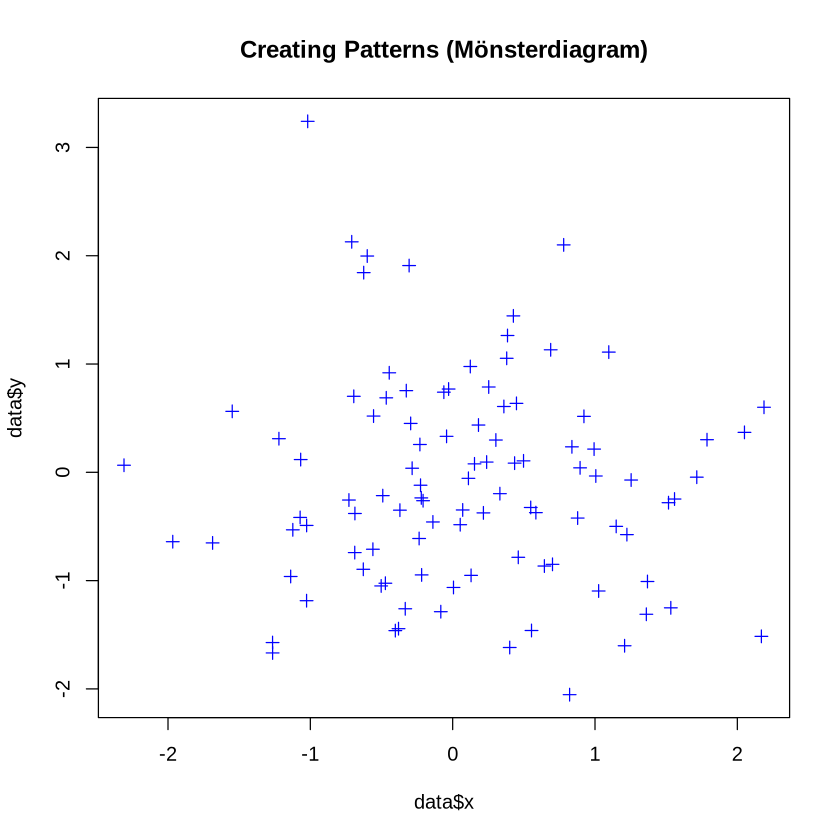

In [145]:
#CREATING PATTERNS (MÖNSTERDIAGRAM)

  
 text<- 'I det här exemplet skapar vi ett diagram med korsmönster. Man kan justera egenskaper som mönstervinkel, densitet och avstånd mellan linjerna genom att ändra parametrarna pattern_angle, pattern_density och pattern_spacing.'
    text

# Skapar enkelt mönsterdiagram i R-Base
set.seed(123)
data <- data.frame(
  x = rnorm(100),
  y = rnorm(100)
)

# Skapa mönsterdiagram
plot(data$x, data$y, col = "blue", pch = 3, main = "Creating Patterns (Mönsterdiagram)")


#Dölj varningsmeddelanden och meddelanden vid start av paket
    suppressMessages({
    #Installerar relevanta R-paket (R-packages):
    install.packages("ggplot2")
    library(ggplot2)
    install.packages("ggpattern")
    library(ggpattern)
 })

    # Skapa exempeldata
    data <- data.frame(
      Kategori = c("A", "B", "C", "D"),
      Värde = c(20, 30, 25, 15)
    )

    # Skapa dataset för att räkna antal observationer per kategori
    count_data <- data.frame(Kategori = rep(data$Kategori, data$Värde))

    # Skapa mönsterdiagrammet
    ggplot(count_data, aes(x = Kategori, fill = Kategori)) +
      geom_bar_pattern(pattern = "crosshatch", pattern_angle = 45, pattern_density = 0.1, pattern_spacing = 0.02) +
      theme_minimal() +
      labs(title = "Mönsterdiagram", x = "Kategori", y = "Antal observationer")



[1] "I detta exempel skapas först ett avståndsmått mellan 10 slumpmässiga observationer med dist-funktionen. Sedan används hclust-funktionen för att utföra hierarkisk klusteranalys på avståndsmåtten och skapa ett dendrogram. Slutligen plottas dendrogrammet med plot-funktionen."

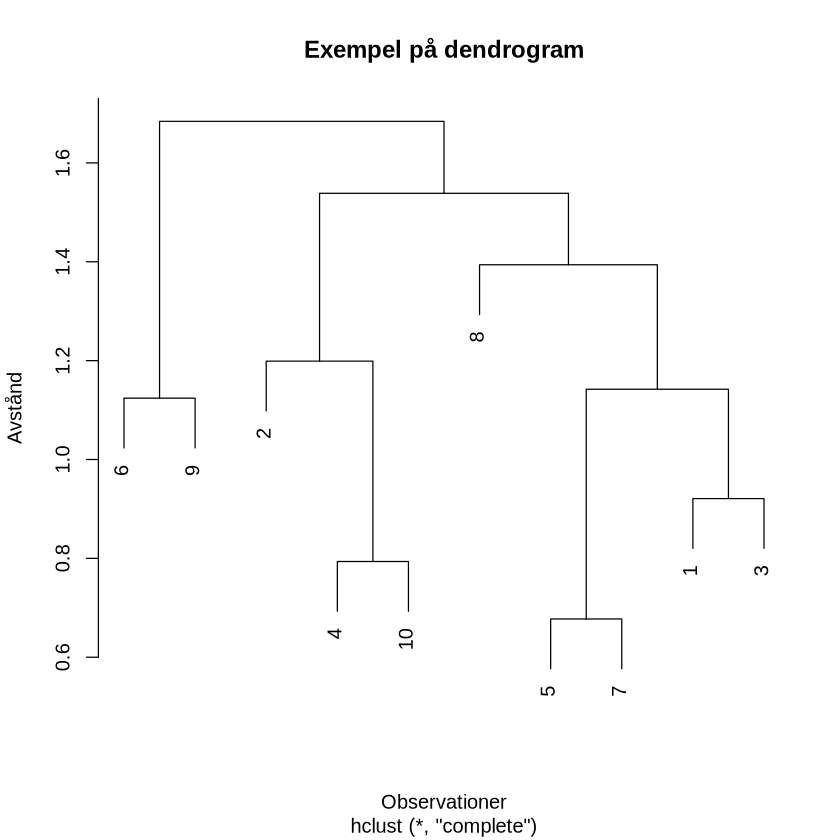

In [52]:
#DENDROGRAM


# Skapa exempeldata för dendrogrammet
avstånd <- dist(matrix(runif(100), ncol = 10))
dendrogram <- hclust(avstånd)

# Plotta dendrogrammet
plot(dendrogram, main = "Exempel på dendrogram", xlab = "Observationer", ylab = "Avstånd")

text<- 'I detta exempel skapas först ett avståndsmått mellan 10 slumpmässiga observationer med dist-funktionen. Sedan används hclust-funktionen för att utföra hierarkisk klusteranalys på avståndsmåtten och skapa ett dendrogram. Slutligen plottas dendrogrammet med plot-funktionen.'
text

[1] "En density plot är en grafisk representation av fördelningen av en variabel, som visar en skattning av sannolikhetsfördelningen för variabeln för att illustrera densiteten av observationer längs variabelns värdesintervall. Density plots är användbara för att visualisera hur data är fördelade och om de följer en viss fördelning, såsom normalfördelning. De ger också insikter i eventuella kluster eller grupperingar av data, samt kan påvisa outliers. I detta exempel använder vi geom_density() från ggplot2 för att skapa density layer av vår plot. Vi specificerar fill för att fylla formen under kurvan med en färg och color för att definiera linjens färg. Alphavärdet ställs in på 0.5 för att ge lite transparens åt fyllnaden. Slutligen anpassar vi etiketterna för x- och y-axlarna för att förbättra presentationen av diagrammet. Resultatet är en density plot som visar fördelningen av variabeln i datasetet."

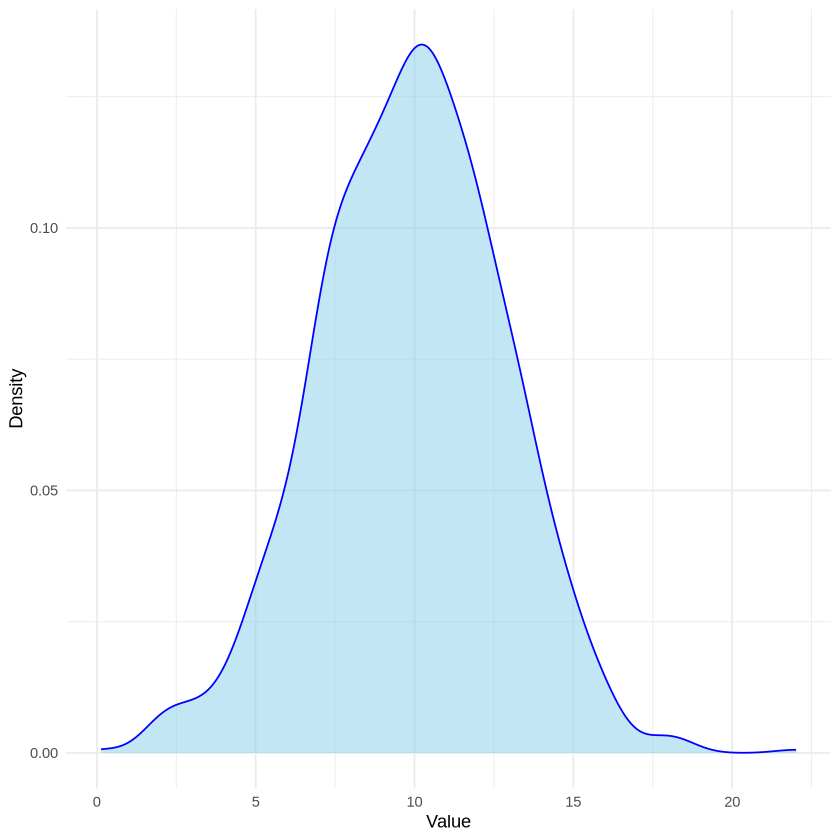

In [53]:
# DENSITY PLOT (TÄTHETSPLOT)


library(ggplot2)

# Skapa ett fiktivt dataset för exemplet
data <- data.frame(
  Value = rnorm(1000, 10, 3)
)

# Skapa Density plot med ggplot2
ggplot(data, aes(x = Value)) +
  geom_density(fill = "skyblue", color = "blue", alpha = 0.5) +  # Density layer
  theme_minimal() +
  labs(x = "Value", y = "Density")  # Anpassa etiketter


text='En density plot är en grafisk representation av fördelningen av en variabel, som visar en skattning av sannolikhetsfördelningen för variabeln för att illustrera densiteten av observationer längs variabelns värdesintervall. Density plots är användbara för att visualisera hur data är fördelade och om de följer en viss fördelning, såsom normalfördelning. De ger också insikter i eventuella kluster eller grupperingar av data, samt kan påvisa outliers. I detta exempel använder vi geom_density() från ggplot2 för att skapa density layer av vår plot. Vi specificerar fill för att fylla formen under kurvan med en färg och color för att definiera linjens färg. Alphavärdet ställs in på 0.5 för att ge lite transparens åt fyllnaden. Slutligen anpassar vi etiketterna för x- och y-axlarna för att förbättra presentationen av diagrammet. Resultatet är en density plot som visar fördelningen av variabeln i datasetet.'
text

[1] "I detta exempel skapas ett donutdiagram där varje kategori representeras av en del av donuten baserat på dess procentandel. Vi använder geom_bar() för att skapa den yttre delen av donuten och sedan en mindre bar för att skapa hålet i mitten."

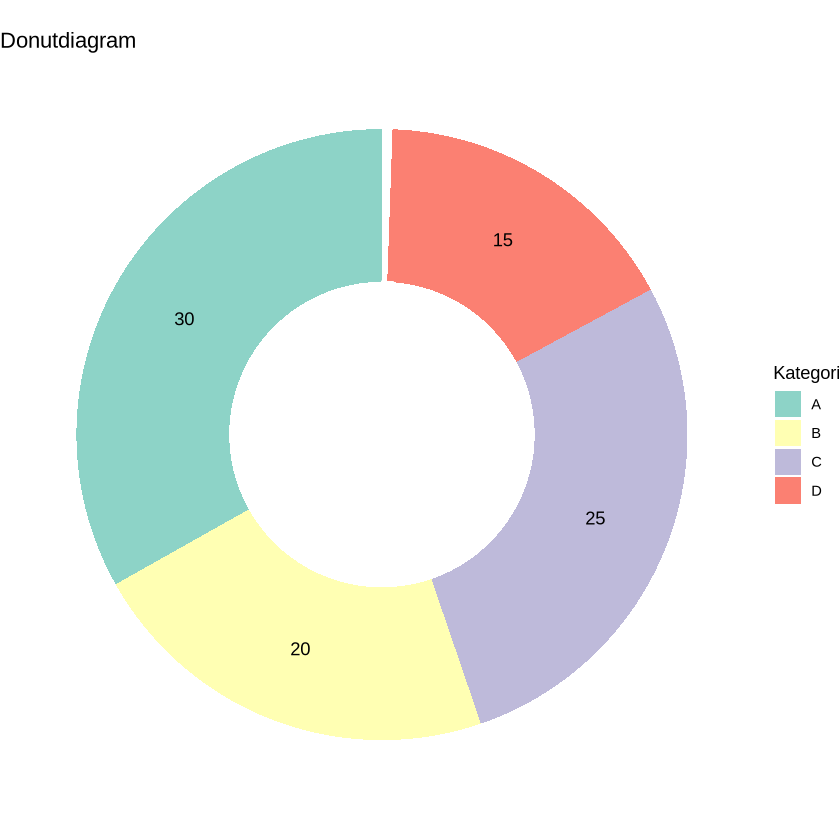

In [54]:
#DONUTDIAGRAM


# Ladda in nödvändiga paket
library(ggplot2)

# Skapa data för donutdiagrammet
data <- data.frame(
  Kategori = c("A", "B", "C", "D"),
  Värde = c(30, 20, 25, 15)
)

# Skapa donutdiagrammet
ggplot(data, aes(x = "", y = Värde, fill = Kategori)) +
  geom_bar(width = 1, stat = "identity") +
  geom_rect(aes(xmin = -0.5, xmax = 0.5, ymin = -0.5, ymax = 0.5), fill = "white", color = "white") +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "right") +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Donutdiagram", fill = "Kategori") +
  geom_text(aes(label = Värde), position = position_stack(vjust = 0.5))

text='I detta exempel skapas ett donutdiagram där varje kategori representeras av en del av donuten baserat på dess procentandel. Vi använder geom_bar() för att skapa den yttre delen av donuten och sedan en mindre bar för att skapa hålet i mitten.'
text


In [72]:
#FLÖDESDIAGRAM (FLOW CHART)


 # Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressMessages({
    #Installerar relevanta R-paket (R-packages):
    install.packages("DiagrammeR")
    library(DiagrammeR)
  })   
     

text='I det här exemplet skapas ett flödesdiagram med tre noder (Start, Steg1 och Steg2) och två bågar mellan dem. Flödesdiagrammet renderas som en SVG-bild, vilket kan visas direkt i R-studion eller sparas som en separat fil. Du kan anpassa flödesdiagrammet genom att ändra koden för att ändra nodernas ordning eller lägga till fler noder och bågar.'
text

# Skapa flödesdiagram
flowchart_code <- '
  digraph {
    Start -> Steg1
    Steg1 -> Steg2
    Steg2 -> Slut
  }
'

# Rendera och visa flödesdiagram
grViz(flowchart_code)



[1] "I det här exemplet skapas ett flödesdiagram med tre noder (Start, Steg1 och Steg2) och två bågar mellan dem. Flödesdiagrammet renderas som en SVG-bild, vilket kan visas direkt i R-studion eller sparas som en separat fil. Du kan anpassa flödesdiagrammet genom att ändra koden för att ändra nodernas ordning eller lägga till fler noder och bågar."

HTML widgets cannot be represented in plain text (need html)

[1] "Fielchart kan användas för att skapa ett diagram med en kvadrat som representerar två variabler och färgkodade fält som representerar den tredje variabeln kan vi använda en kombination av ggplot2 för att rita kvadraten och färga fälten, samt geom_tile för att representera fälten."

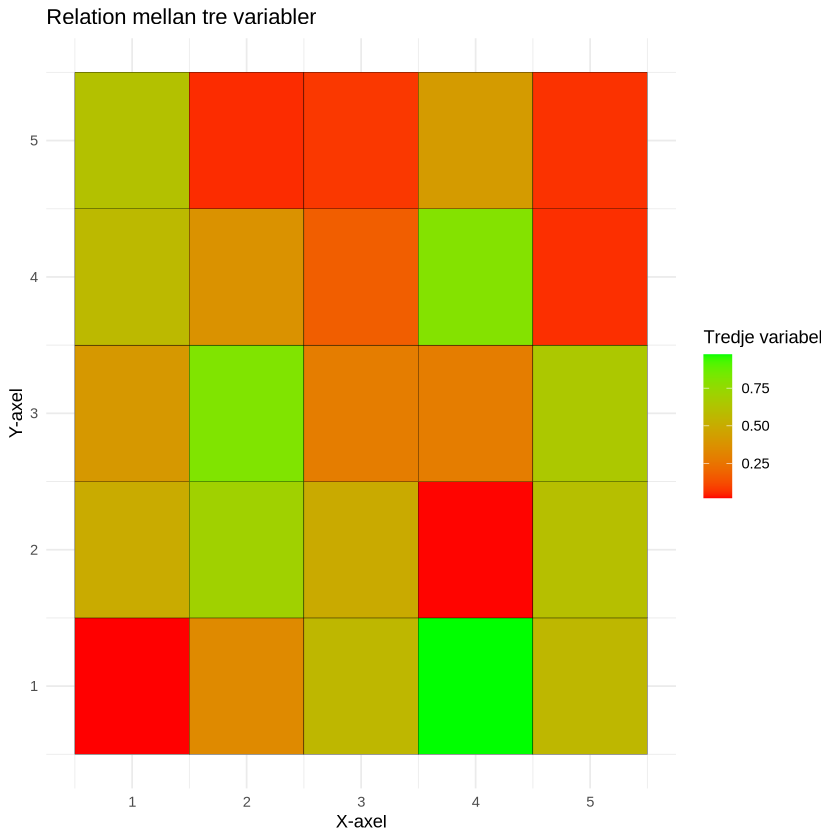

In [58]:
#FIELDCHART


# Installera och ladda ggplot2-paketet
#install.packages("ggplot2")
library(ggplot2)

# Exempeldata
data <- expand.grid(x = 1:5, y = 1:5)
data$z <- runif(nrow(data))  # Slumpmässiga värden för den tredje variabeln

# Skapa anpassad färgskala med rött och grönt
custom_palette <- c("red", "green")

# Skapa fältplot med anpassad färgskala
ggplot(data, aes(x = x, y = y, fill = z)) +
  geom_tile(color = "black") +  # Använd geom_tile för att skapa fälten
  scale_fill_gradientn(colors = custom_palette) +  # Använd anpassad färgskala
  labs(
    title = "Relation mellan tre variabler",
    x = "X-axel",
    y = "Y-axel",
    fill = "Tredje variabel"
  ) +
  theme_minimal()  # Anpassa temat för att få en enkel bakgrund

text<- 'Fielchart kan användas för att skapa ett diagram med en kvadrat som representerar två variabler och färgkodade fält som representerar den tredje variabeln kan vi använda en kombination av ggplot2 för att rita kvadraten och färga fälten, samt geom_tile för att representera fälten.'
text

[1] "Detta skapar ett enkelt Gantt-diagram med fyra olika uppgifter som sträcker sig över olika tidsperioder. Man kan anpassa detta exempel med egna data och behov för att skapa ett Gantt-diagram för ett projekt."

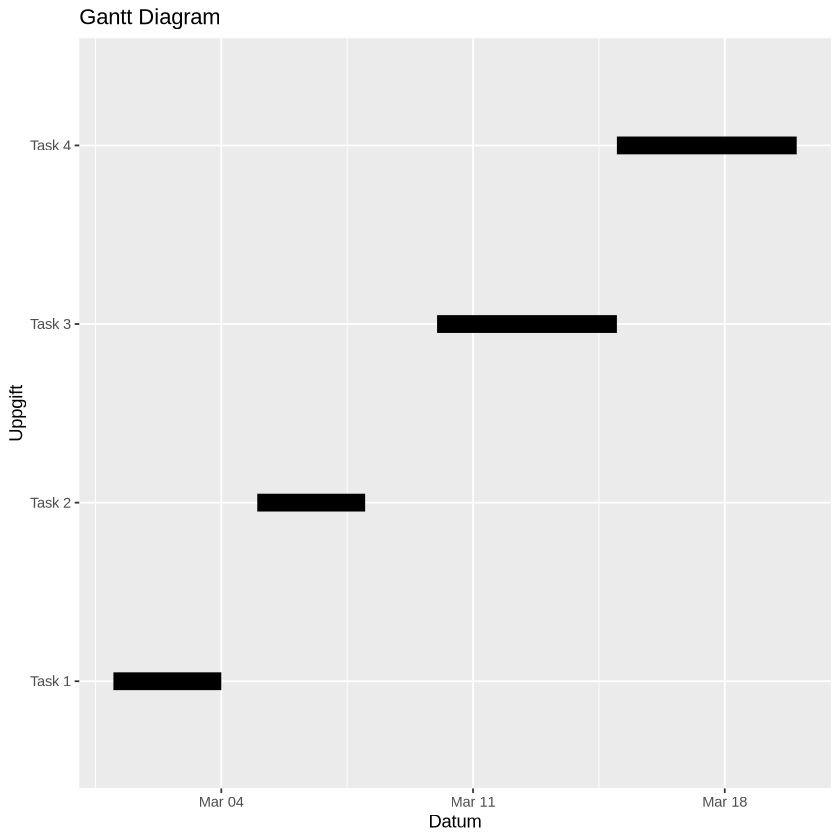

In [59]:
#GANTT-DIAGRAM


library(ggplot2)

# Skapa exempeldata för Gantt-diagram
data <- data.frame(
  Task = c("Task 1", "Task 2", "Task 3", "Task 4"),
  Start = as.POSIXct(c("2024-03-01", "2024-03-05", "2024-03-10", "2024-03-15")),
  End = as.POSIXct(c("2024-03-04", "2024-03-08", "2024-03-15", "2024-03-20"))
)

# Skapa Gantt-diagram med ggplot2
ggplot(data, aes(y = Task, x = Start, xend = End, yend = Task)) +
  geom_segment(linewidth = 5) +
  labs(
    title = "Gantt Diagram",
    x = "Datum",
    y = "Uppgift"
  )

text<-'Detta skapar ett enkelt Gantt-diagram med fyra olika uppgifter som sträcker sig över olika tidsperioder. Man kan anpassa detta exempel med egna data och behov för att skapa ett Gantt-diagram för ett projekt.'
text

[1] "I detta exempel skapar vi en slumpmässig 10x10-matris. Vi använder sedan ggplot() för att skapa en plot med geom_tile() för att rita varje cell i heatmapen. Vi använder scale_fill_gradient() för att tillämpa en gradientfärg från blå till röd på heatmapen."

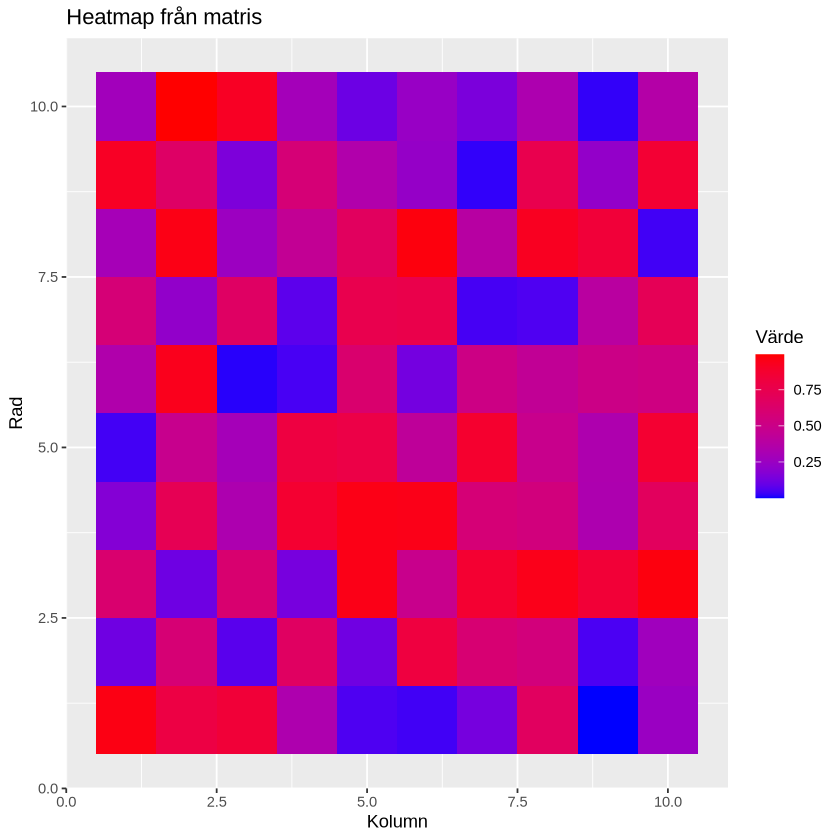

In [61]:
#HEATMAP


 # Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressMessages({
    install.packages("reshape2")
    library(reshape2)
  })   


# Skapa exempeldata för matris
data <- matrix(runif(100), ncol = 10)  # Slumpmässiga värden i en 10x10-matris

# Skapa heatmap med ggplot2
ggplot(melt(data), aes(Var2, Var1, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +  # Gradientfärg från blå till röd
  labs(
    title = "Heatmap från matris",
    x = "Kolumn",
    y = "Rad",
    fill = "Värde"
  )

text<-'I detta exempel skapar vi en slumpmässig 10x10-matris. Vi använder sedan ggplot() för att skapa en plot med geom_tile() för att rita varje cell i heatmapen. Vi använder scale_fill_gradient() för att tillämpa en gradientfärg från blå till röd på heatmapen.'
text


[1] "Hexbin är en typ av diagram som används för att visualisera densitet och fördelning av datapunkter tvådimensionellt. Istället för att använda traditionella punkter eller linjer, använder hexbin plot hexagonala bin för att representera fördelningen av datapunkter. Varje hexagon representerar ett område av datarummet och färgen eller intensiteten av hexagonen indikerar antalet datapunkter som finns inom området. Hexbin plots är särskilt användbara vid en stor mängd datapunkter som behöver visualisers, och gör det lättare att identifiera mönster och kluster. I detta exempel genererar vi två vektorer med slumpmässiga datapunkter för x- och y-variablerna. Sedan skapar vi en hexbin plot med hjälp av hexbin()-funktionen från hexbin-paketet och anger antalet binar (xbins) för att kontrollera upplösningen av hexagonerna. Slutligen använder vi plot()-funktionen för att rita hexbin plot med den skapade hexbin-objektet och specificerar huvudtiteln och axelbeskrivningarna. Resultatet är en hexbin plot som visualiserar fördelningen av datapunkterna i det tvådimensionella datarummet med hexagonala bin."

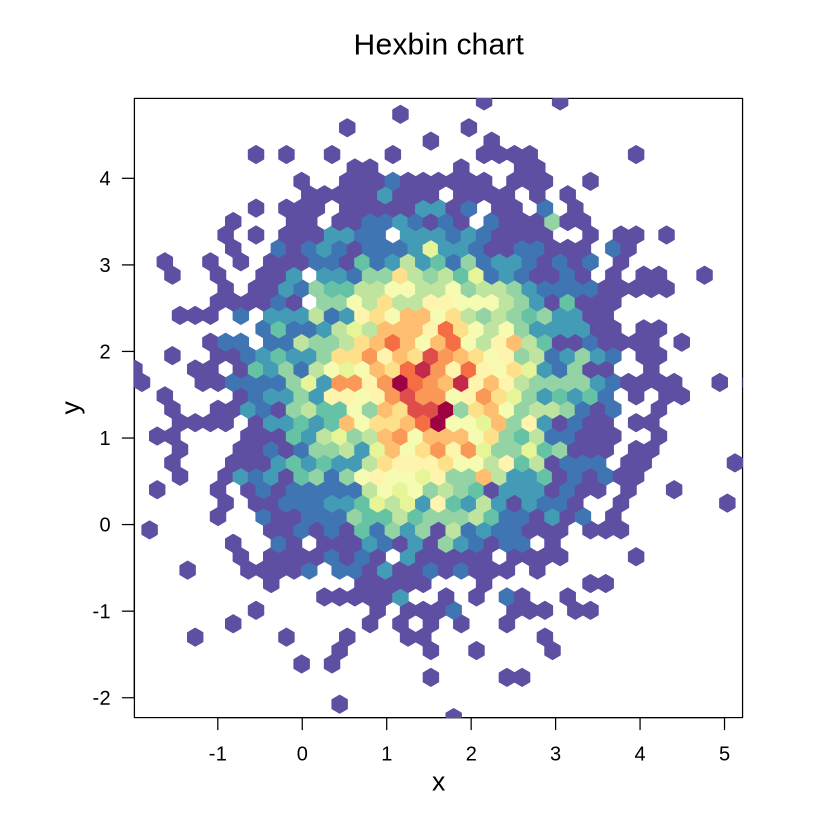

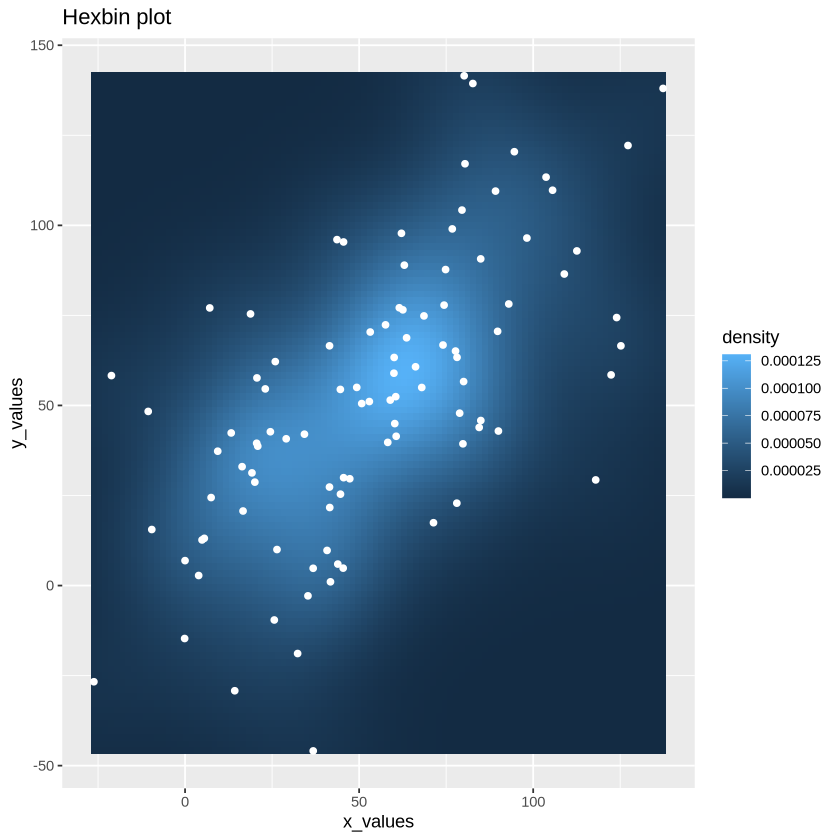

In [69]:
# HEXBIN CHART


text<-'Hexbin är en typ av diagram som används för att visualisera densitet och fördelning av datapunkter tvådimensionellt. Istället för att använda traditionella punkter eller linjer, använder hexbin plot hexagonala bin för att representera fördelningen av datapunkter. Varje hexagon representerar ett område av datarummet och färgen eller intensiteten av hexagonen indikerar antalet datapunkter som finns inom området. Hexbin plots är särskilt användbara vid en stor mängd datapunkter som behöver visualisers, och gör det lättare att identifiera mönster och kluster. I detta exempel genererar vi två vektorer med slumpmässiga datapunkter för x- och y-variablerna. Sedan skapar vi en hexbin plot med hjälp av hexbin()-funktionen från hexbin-paketet och anger antalet binar (xbins) för att kontrollera upplösningen av hexagonerna. Slutligen använder vi plot()-funktionen för att rita hexbin plot med den skapade hexbin-objektet och specificerar huvudtiteln och axelbeskrivningarna. Resultatet är en hexbin plot som visualiserar fördelningen av datapunkterna i det tvådimensionella datarummet med hexagonala bin.'
text


# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("hexbin")
    install.packages("RColorBrewer")
    library(hexbin)
    library(RColorBrewer)
  }) 

suppressPackageStartupMessages(library(hexbin))
suppressPackageStartupMessages(library(RColorBrewer))

# Create data
x <- rnorm(mean=1.5, 5000)
y <- rnorm(mean=1.6, 5000)

bin<-hexbin(x, y, xbins=40)
my_colors=colorRampPalette(rev(brewer.pal(11,'Spectral')))
p <- plot(bin, main="Hexbin chart" , colramp=my_colors , legend=F ) 

p


# HEXBIN PLOT

library(ggplot2) 

# data
sample_data <- data.frame(x_values = 1:100 + rnorm(100,sd=20), y_values = 1:100 + rnorm(100,sd=27)) 

#plot
p <- ggplot(sample_data, aes(x_values, y_values)) +
  stat_density2d(geom="tile", aes(fill = ..density..), contour = FALSE) + 
  geom_point(colour = "white") +
  labs(title = "Hexbin plot")

p

 }) 


[1] "Ett histogram visar fördelningen av en enskild numerisk variabel genom att dela in dess värden i olika intervall och räkna antalet observationer i varje intervall. I detta exempel använder vi rnorm() för att generera 1000 slumpmässiga observationer från en standard normalfördelning. Sedan använder vi ggplot() för att skapa ett histogram med geom_histogram(). binwidth-argumentet styr bredden på staplarna i histogrammet. Fill-argumentet styr färgen på staplarna, och alpha-argumentet styr genomskinligheten. Du kan också ändra färgen på staplarna och ramen genom att ändra fill."

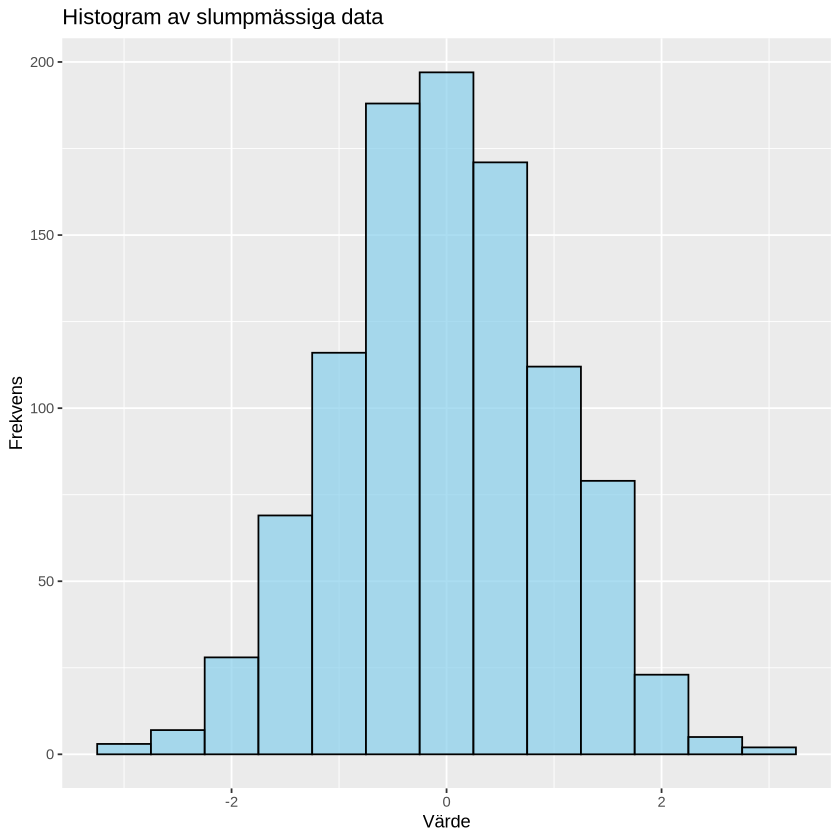

In [70]:
#HISTOGRAM

# Skapa slumpmässiga data
data <- rnorm(1000)  # 1000 slumpmässiga observationer från en normalfördelning

# Skapa histogram med ggplot2
library(ggplot2)
ggplot(data.frame(x = data), aes(x)) +
  geom_histogram(binwidth = 0.5, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(
    title = "Histogram av slumpmässiga data",
    x = "Värde",
    y = "Frekvens"
  )

text<-'Ett histogram visar fördelningen av en enskild numerisk variabel genom att dela in dess värden i olika intervall och räkna antalet observationer i varje intervall. I detta exempel använder vi rnorm() för att generera 1000 slumpmässiga observationer från en standard normalfördelning. Sedan använder vi ggplot() för att skapa ett histogram med geom_histogram(). binwidth-argumentet styr bredden på staplarna i histogrammet. Fill-argumentet styr färgen på staplarna, och alpha-argumentet styr genomskinligheten. Du kan också ändra färgen på staplarna och ramen genom att ändra fill.'
text

[1] "Hexbin är en typ av diagram som används för att visualisera densitet och fördelning av datapunkter tvådimensionellt. Istället för att använda traditionella punkter eller linjer, använder hexbin plot hexagonala bin för att representera fördelningen av datapunkter. Varje hexagon representerar ett område av datarummet och färgen eller intensiteten av hexagonen indikerar antalet datapunkter som finns inom området. Hexbin plots är särskilt användbara vid en stor mängd datapunkter som behöver visualisers, och gör det lättare att identifiera mönster och kluster. I detta exempel genererar vi två vektorer med slumpmässiga datapunkter för x- och y-variablerna. Sedan skapar vi en hexbin plot med hjälp av hexbin()-funktionen från hexbin-paketet och anger antalet binar (xbins) för att kontrollera upplösningen av hexagonerna. Slutligen använder vi plot()-funktionen för att rita hexbin plot med den skapade hexbin-objektet och specificerar huvudtiteln och axelbeskrivningarna. Resultatet är en hexbin plot som visualiserar fördelningen av datapunkterna i det tvådimensionella datarummet med hexagonala bin."

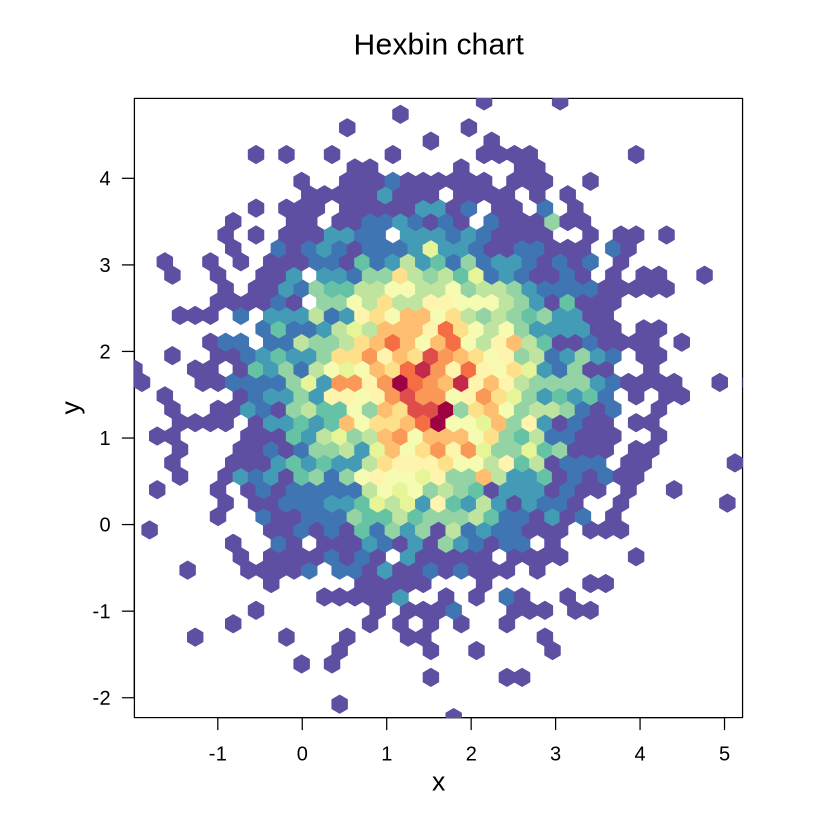

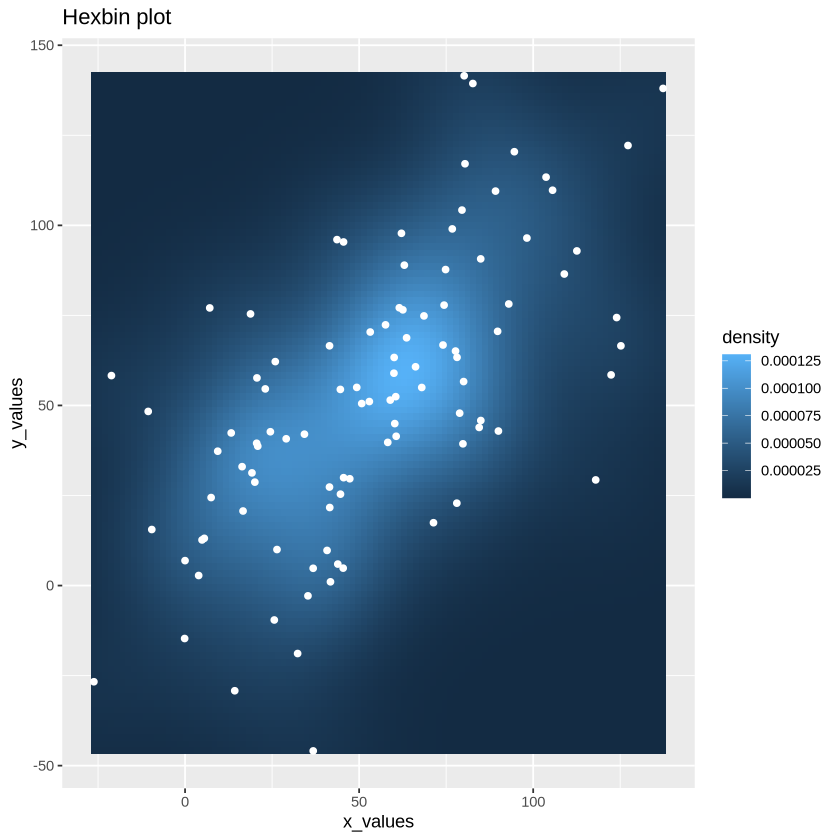

In [69]:
# HEXBIN CHART


text<-'Hexbin är en typ av diagram som används för att visualisera densitet och fördelning av datapunkter tvådimensionellt. Istället för att använda traditionella punkter eller linjer, använder hexbin plot hexagonala bin för att representera fördelningen av datapunkter. Varje hexagon representerar ett område av datarummet och färgen eller intensiteten av hexagonen indikerar antalet datapunkter som finns inom området. Hexbin plots är särskilt användbara vid en stor mängd datapunkter som behöver visualisers, och gör det lättare att identifiera mönster och kluster. I detta exempel genererar vi två vektorer med slumpmässiga datapunkter för x- och y-variablerna. Sedan skapar vi en hexbin plot med hjälp av hexbin()-funktionen från hexbin-paketet och anger antalet binar (xbins) för att kontrollera upplösningen av hexagonerna. Slutligen använder vi plot()-funktionen för att rita hexbin plot med den skapade hexbin-objektet och specificerar huvudtiteln och axelbeskrivningarna. Resultatet är en hexbin plot som visualiserar fördelningen av datapunkterna i det tvådimensionella datarummet med hexagonala bin.'
text


# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("hexbin")
    install.packages("RColorBrewer")
    library(hexbin)
    library(RColorBrewer)
  }) 

suppressPackageStartupMessages(library(hexbin))
suppressPackageStartupMessages(library(RColorBrewer))

# Create data
x <- rnorm(mean=1.5, 5000)
y <- rnorm(mean=1.6, 5000)

bin<-hexbin(x, y, xbins=40)
my_colors=colorRampPalette(rev(brewer.pal(11,'Spectral')))
p <- plot(bin, main="Hexbin chart" , colramp=my_colors , legend=F ) 

p


# HEXBIN PLOT

library(ggplot2) 

# data
sample_data <- data.frame(x_values = 1:100 + rnorm(100,sd=20), y_values = 1:100 + rnorm(100,sd=27)) 

#plot
p <- ggplot(sample_data, aes(x_values, y_values)) +
  stat_density2d(geom="tile", aes(fill = ..density..), contour = FALSE) + 
  geom_point(colour = "white") +
  labs(title = "Hexbin plot")

p

 }) 


[1] "Detta är ett klockdiagram som visualiserar olika aspekter av tidsfördelning genom att kombinera visare, skalstreck och ett cirkeldiagram i mitten. De röda visarna representerar tiden och pekar på olika timmar runt klockan.De gröna linjerna representerar skalstrecken som delar klockans cirkulära yta i timmar. I mitten av klockan finns ett cirkeldiagram som är uppdelat i tre sektioner, var och en representerar en annan kategori eller aspekt av data. Dessa sektioner är färgkodade i blått, grönt och gult.Varje del av cirkeldiagrammet visar fördelningen av en specifik kategori eller aspekt för hela tidsperioden som representeras av klockan. Sammanfattningsvis kombinerar detta diagram flera visuella element för att ge en översiktlig bild av tidsfördelningen i olika kategorier eller aspekter."

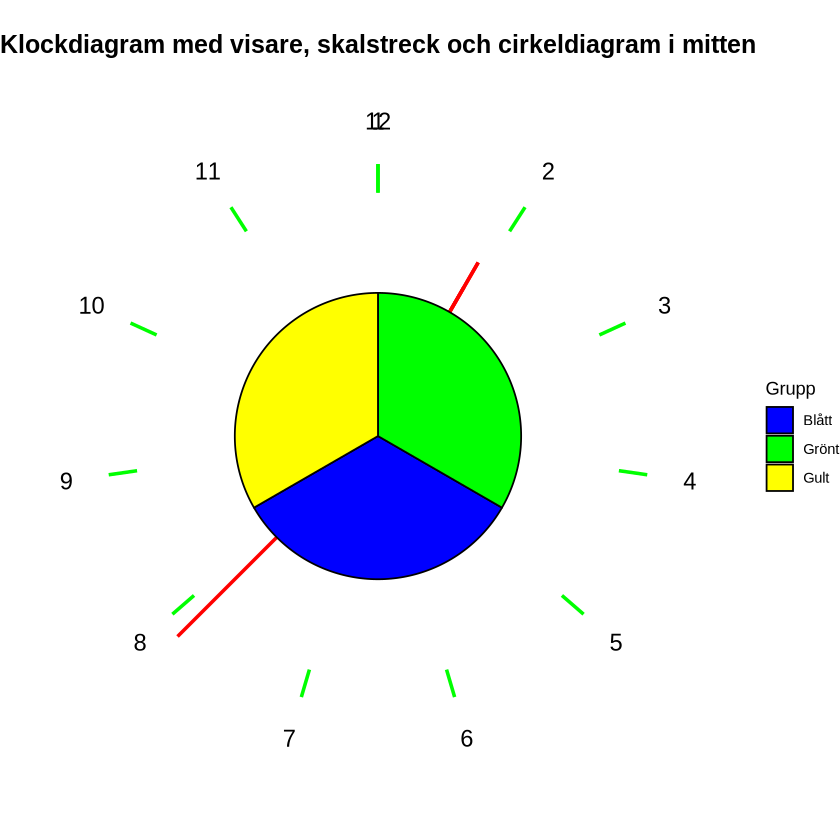

In [78]:
#KLOCKDIAGRAM


# Installera och ladda nödvändiga paket
library(ggplot2)

# Skapa data för visare och skalstreck
visare_data <- data.frame(
  X = c(0, 0.7 * sin(pi/6), 0.6 * sin(pi/6)),
  Y = c(0, 0.7 * cos(pi/6), 0.6 * cos(pi/6))
)

visare_data2 <- data.frame(
  X = c(-0.7, 0.7 * sin(pi/6), 0.5 * sin(pi/6)),
  Y = c(-0.7, 0.7 * cos(pi/6), 0.5 * cos(pi/6))
)

skalstreck_data <- data.frame(
  Start_X = 0.85 * sin(seq(0, 2 * pi, length.out = 12)),
  Start_Y = 0.85 * cos(seq(0, 2 * pi, length.out = 12)),
  End_X = 0.95 * sin(seq(0, 2 * pi, length.out = 12)),
  End_Y = 0.95 * cos(seq(0, 2 * pi, length.out = 12))
)

# Skapa data för cirkeldiagrammet i mitten
cirkel_data <- data.frame(
  X = c(rep(0, 100), 0.5 * sin(seq(0, 2 * pi / 3, length.out = 100)), rep(0, 100), 0.5 * sin(seq(2 * pi / 3, 4 * pi / 3, length.out = 100)), rep(0, 100), 0.5 * sin(seq(4 * pi / 3, 2 * pi, length.out = 100))),
  Y = c(rep(0, 100), 0.5 * cos(seq(0, 2 * pi / 3, length.out = 100)), rep(0, 100), 0.5 * cos(seq(2 * pi / 3, 4 * pi / 3, length.out = 100)), rep(0, 100), 0.5 * cos(seq(4 * pi / 3, 2 * pi, length.out = 100))),
  Grupp = rep(c("Blått", "Grönt", "Gult"), each = 100)
)

# Skapa klockdiagram med visare, skalstreck och cirkeldiagram i mitten
ggplot() +
  geom_segment(data = visare_data, aes(x = X, y = Y, xend = 0, yend = 0), arrow = arrow(length = unit(0.1, "cm")), color = "red", size = 1) +
  geom_segment(data = visare_data2, aes(x = X, y = Y, xend = 0, yend = 0), arrow = arrow(length = unit(0.1, "cm")), color = "red", size = 1) +
  geom_segment(data = skalstreck_data, aes(x = Start_X, y = Start_Y, xend = End_X, yend = End_Y), color = "green", size = 1) +
  geom_text(aes(x = 1.1 * sin(seq(0, 2 * pi, length.out = 12)), y = 1.1 * cos(seq(0, 2 * pi, length.out = 12)), label = 1:12), size = 5) +
  geom_polygon(data = cirkel_data, aes(x = X, y = Y, fill = Grupp), color = "black") +  # Cirkeldiagram i mitten
  coord_fixed() +
  theme_void() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    plot.title = element_text(hjust = 0.5, size = 15, face = "bold")
  ) +
  scale_fill_manual(values = c("Blått" = "blue", "Grönt" = "green", "Gult" = "yellow")) +  # Ange färgerna för cirkeldiagrammet
  xlim(c(-1.2, 1.2)) +
  ylim(c(-1.2, 1.2)) +
  ggtitle("Klockdiagram med visare, skalstreck och cirkeldiagram i mitten")

text='Detta är ett klockdiagram som visualiserar olika aspekter av tidsfördelning genom att kombinera visare, skalstreck och ett cirkeldiagram i mitten. De röda visarna representerar tiden och pekar på olika timmar runt klockan.De gröna linjerna representerar skalstrecken som delar klockans cirkulära yta i timmar. I mitten av klockan finns ett cirkeldiagram som är uppdelat i tre sektioner, var och en representerar en annan kategori eller aspekt av data. Dessa sektioner är färgkodade i blått, grönt och gult.Varje del av cirkeldiagrammet visar fördelningen av en specifik kategori eller aspekt för hela tidsperioden som representeras av klockan. Sammanfattningsvis kombinerar detta diagram flera visuella element för att ge en översiktlig bild av tidsfördelningen i olika kategorier eller aspekter.'
text

[1] "En korrelationsmatris är en visuell representation av korrelationen mellan variabler i en datamängd. I en sådan typ av matris presenteras korrelationerna mellan alla möjliga par av variabler i form av en tabell eller en grafisk representation. Det är ett användbart verktyg för att upptäcka mönster och relationer mellan variabler i data. I detta exempel skapas en slumpmässig datamängd data med 10 variabler och 10 observationer. Sedan beräknas korrelationsmatrisen med cor()-funktionen, och slutligen visas den med corrplot()-funktionen med metoden color. Detta genererar en färgkodad korrelationsmatris, där färgerna representerar styrkan och riktningen av korrelationen mellan variablerna."

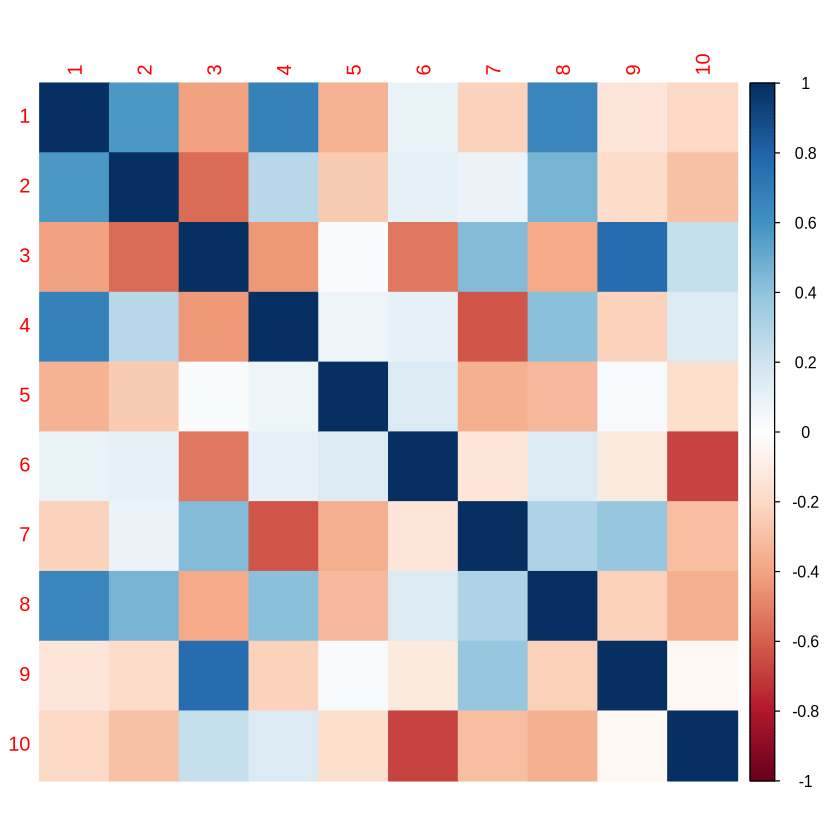

In [81]:
#Korrelationsmatris



# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressMessages({
    install.packages("corrplot")
    library(corrplot)
   }) 

# Skapa slumpmässig datamängd
set.seed(123)
data <- matrix(rnorm(100), ncol = 10)

# Beräkna korrelationsmatris
correlation_matrix <- cor(data)

# Visa korrelationsmatrisen med corrplot
corrplot(correlation_matrix, method = "color")

text='En korrelationsmatris är en visuell representation av korrelationen mellan variabler i en datamängd. I en sådan typ av matris presenteras korrelationerna mellan alla möjliga par av variabler i form av en tabell eller en grafisk representation. Det är ett användbart verktyg för att upptäcka mönster och relationer mellan variabler i data. I detta exempel skapas en slumpmässig datamängd data med 10 variabler och 10 observationer. Sedan beräknas korrelationsmatrisen med cor()-funktionen, och slutligen visas den med corrplot()-funktionen med metoden color. Detta genererar en färgkodad korrelationsmatris, där färgerna representerar styrkan och riktningen av korrelationen mellan variablerna.'
text

[1] "I detta exempel genererar vi först exempeldata som representerar en trend över tid. Sedan använder vi ggplot2 för att skapa ett linjediagram med dessa data. Vi anpassar färg, tjocklek och storlek för linjen och punkterna, samt justerar titlar och textstorlekar för att göra diagrammet mer visuellt tilltalande. Slutligen använder vi theme_minimal() för att använda ett stilrent tema för hela diagrammet."

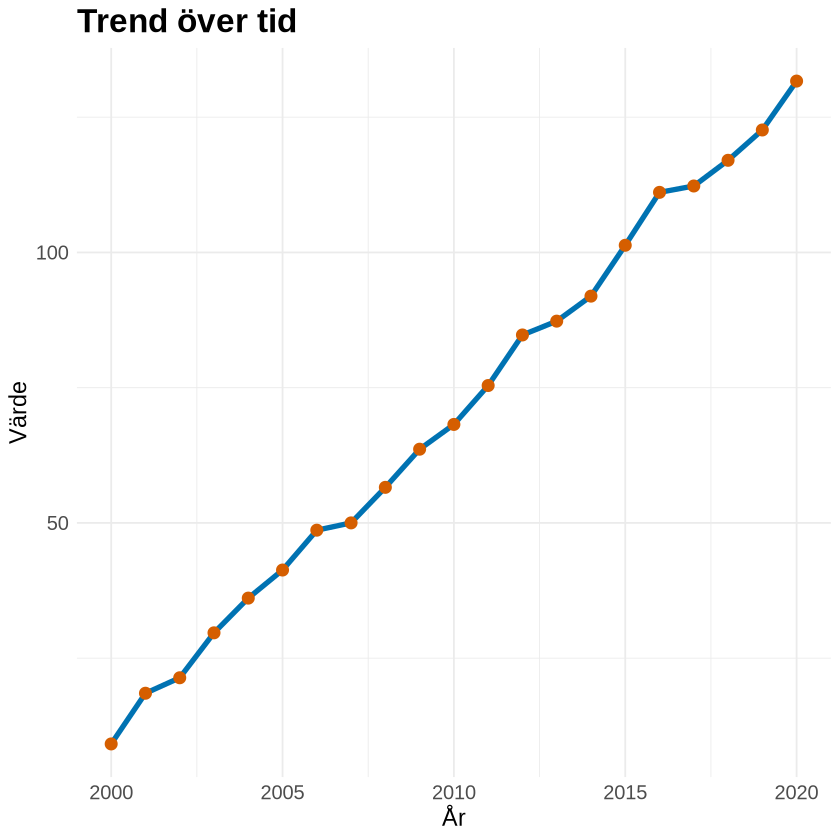

In [82]:
#LINJEDIAGRAM


# Först laddar vi in ggplot2-paketet
library(ggplot2)

# Skapa exempeldata för linjediagrammet
set.seed(42)
data <- data.frame(
  Year = 2000:2020,
  Value = cumsum(runif(21, min = 0, max = 10))
)

# Skapa linjediagrammet med ggplot2
ggplot(data, aes(x = Year, y = Value)) +
  geom_line(color = "#0072B2", size = 1.5) +  # Linje med anpassad färg och tjocklek
  geom_point(color = "#D55E00", size = 3) +  # Punkter med anpassad färg och storlek
  theme_minimal() +  # Använd ett rent och stilrent tema
  labs(
    title = "Trend över tid",  # Titel för diagrammet
    x = "År",  # Titel för x-axeln
    y = "Värde"  # Titel för y-axeln
  ) +
  theme(
    plot.title = element_text(size = 20, face = "bold"),  # Anpassa titelstorlek och fetstil
    axis.text = element_text(size = 12),  # Anpassa textstorlek för axlarna
    axis.title = element_text(size = 14),  # Anpassa textstorlek för axeltitlarna
    legend.position = "none"  # Ta bort legenden för detta enkla exempel
  )

text<- 'I detta exempel genererar vi först exempeldata som representerar en trend över tid. Sedan använder vi ggplot2 för att skapa ett linjediagram med dessa data. Vi anpassar färg, tjocklek och storlek för linjen och punkterna, samt justerar titlar och textstorlekar för att göra diagrammet mer visuellt tilltalande. Slutligen använder vi theme_minimal() för att använda ett stilrent tema för hela diagrammet.' 
text

[1] "En lollipop plot är en typ av diagram som används för att visualisera datapunkter som en kombination av cirkulära markörer (ofta punkter eller cirklar) och vertikala linjer. Det är en variant av ett stolpdiagram där markörerna för datapunkterna placeras på en linje istället för vid dess ände. Detta gör det lättare att jämföra storleken på varje datapunkt. Lollipop plottar används vanligtvis för att visa en mängd datapunkter på ett sätt som möjliggör en snabb visuell bedömning av variation och mönster. Det kan vara särskilt användbart när man jämför många datapunkter över olika kategorier eller tidsperioder. I detta exempel använder vi geom_segment() för att rita de vertikala linjerna och geom_point() för att rita  punkterna/markörerna för varje datapunkt.Vi roterar diagrammet med coord_flip() för att placera kategorierna längs y-axeln istället för x-axeln. Resultatet är en lollipop plot som visar datapunkterna för varje kategori med vertikala linjer och cirkulära markörer."

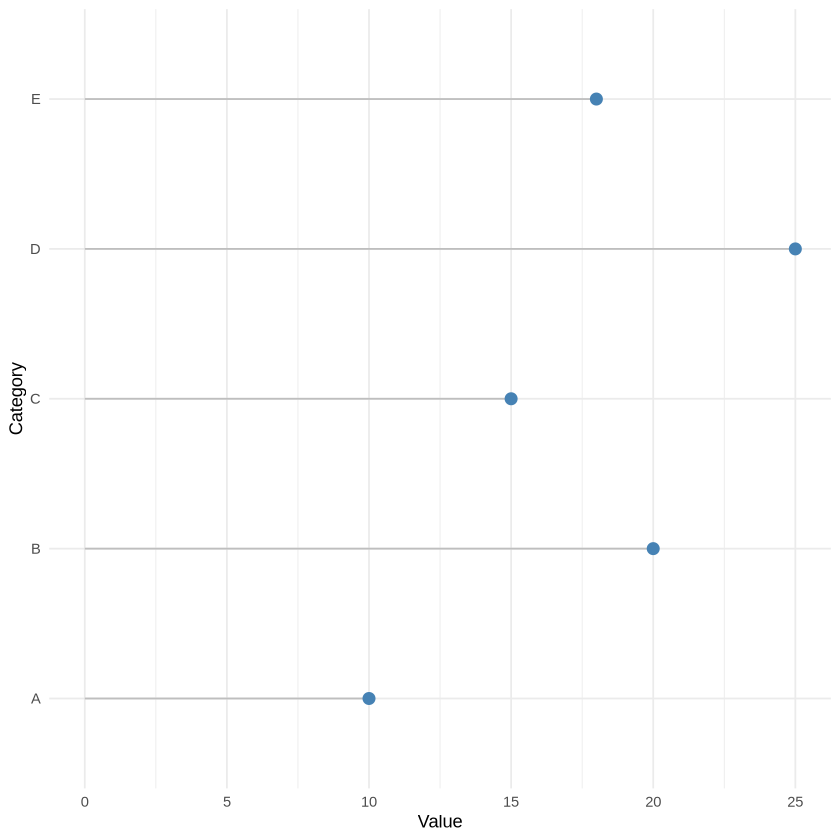

In [83]:
# LOLLIPOP PLOT


library(ggplot2)

# Skapa ett fiktivt dataset för exemplet
data <- data.frame(
  Category = c("A", "B", "C", "D", "E"),
  Value = c(10, 20, 15, 25, 18)
)

# Skapa Lollipop plot
ggplot(data, aes(x = Category, y = Value)) +
  geom_segment(aes(xend = Category, yend = 0), color = "grey") +  # Vertikala linjer
  geom_point(size = 3, color = "steelblue") +  # Punkter/markörer
  theme_minimal() +
  coord_flip() +  # Rotera diagrammet för att placera kategorier längs y-axeln
  labs(x = "Category", y = "Value")  # Anpassa etiketter

text<- 'En lollipop plot är en typ av diagram som används för att visualisera datapunkter som en kombination av cirkulära markörer (ofta punkter eller cirklar) och vertikala linjer. Det är en variant av ett stolpdiagram där markörerna för datapunkterna placeras på en linje istället för vid dess ände. Detta gör det lättare att jämföra storleken på varje datapunkt. Lollipop plottar används vanligtvis för att visa en mängd datapunkter på ett sätt som möjliggör en snabb visuell bedömning av variation och mönster. Det kan vara särskilt användbart när man jämför många datapunkter över olika kategorier eller tidsperioder. I detta exempel använder vi geom_segment() för att rita de vertikala linjerna och geom_point() för att rita  punkterna/markörerna för varje datapunkt.Vi roterar diagrammet med coord_flip() för att placera kategorierna längs y-axeln istället för x-axeln. Resultatet är en lollipop plot som visar datapunkterna för varje kategori med vertikala linjer och cirkulära markörer.'
text

[1] "För att skapa ett kartdiagram över Sverige i R kan du använda paketet maps för att hämta kartdata och paketet ggplot2 för att rita kartan. Detta skapar ett enkelt kartdiagram över Sverige med en ljusblå fyllning och svarta linjer som representerar landets konturer. Man kan anpassa färgen, linjetjockleken och andra estetiska aspekter efter önskemål."

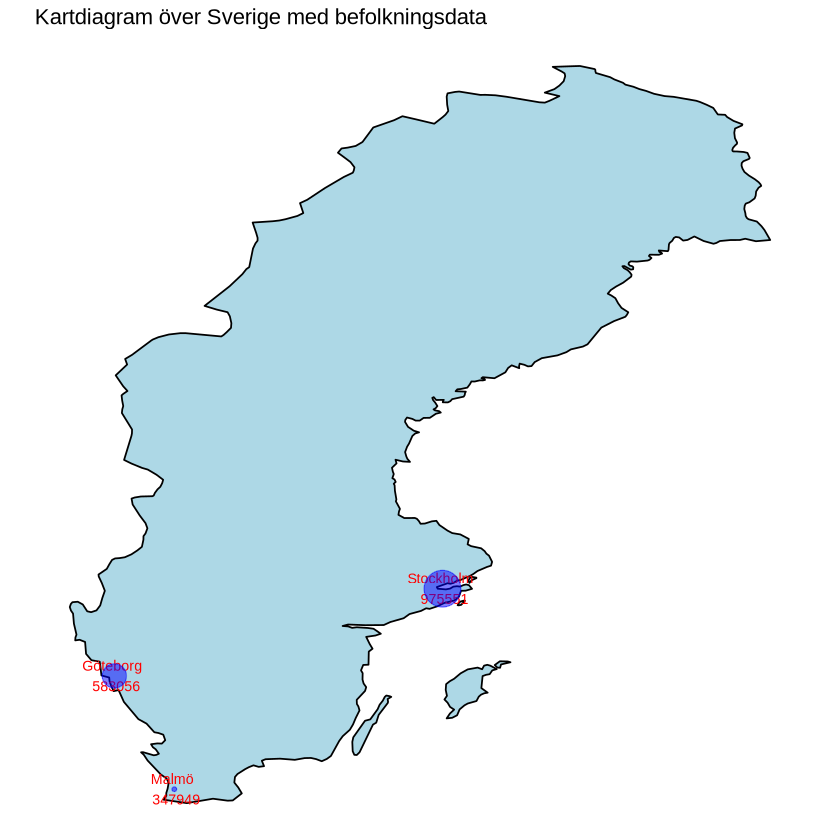

In [85]:
#MAPS (KARTDIAGRAM)


# Dölj varningsmeddelanden och meddelanden vid start av paket

  suppressMessages({
    install.packages("maps")
    library(maps)
   }) 

# Hämta kartdata för Sverige
sweden <- map_data("world", region = "Sweden")

# Skapa en dataframe med befolkningsdata för Stockholm, Göteborg och Malmö
cities <- data.frame(
  city = c("Stockholm", "Göteborg", "Malmö"),
  population = c(975551, 583056, 347949),
  long = c(18.0686, 11.9746, 13.0878),  # Longitudkoordinater för varje stad
  lat = c(59.3293, 57.7089, 55.6050)     # Latitudkoordinater för varje stad
)

# Skapa kartdiagrammet med ggplot2
ggplot() +
  geom_polygon(data = sweden, aes(x = long, y = lat, group = group), fill = "lightblue", color = "black") +
  geom_text(data = cities, aes(x = long, y = lat, label = paste(city, "\n", population)), size = 3, color = "red") +  # Lägg till text för städerna med befolkningsstorlek
  geom_point(data = cities, aes(x = long, y = lat, size = population), color = "blue", alpha = 0.5) +  # Lägg till punkter för städerna med storlek som representerar befolkningsstorlek
  scale_size_continuous(range = c(1, 10)) +  # Anpassa storleken på punkterna
  theme_void() +
  theme(legend.position = "none") +
  labs(title = "Kartdiagram över Sverige med befolkningsdata") +
  coord_fixed()

text<-'För att skapa ett kartdiagram över Sverige i R kan du använda paketet maps för att hämta kartdata och paketet ggplot2 för att rita kartan. Detta skapar ett enkelt kartdiagram över Sverige med en ljusblå fyllning och svarta linjer som representerar landets konturer. Man kan anpassa färgen, linjetjockleken och andra estetiska aspekter efter önskemål.'
text


In [90]:
# NÄTVERKSDIAGRAM


text<- 'Ett nätverksdiagram i R är en visuell representation av relationer mellan olika enheter, som kan vara allt från individer och organisationer till koncept och platser. I ett nätverksdiagram representeras enheterna av noder (punkter), medan relationerna mellan enheterna representeras av kanter (linjer eller pilar). Nätverksdiagram används ofta för att visualisera komplexa relationella strukturer och analysera mönster och egenskaper i nätverk. Nätverksdiagram i R kan vara enkla eller komplexa beroende på data och de analysbehov som behöver adresseras. Du kan anpassa utseendet på noderna och kanterna, inklusive deras storlek, färg och form. Denna R-kod skapar och visualiserar ett enkelt nätverk. Resultatet av denna kod är en enkel visualisering av nätverket med noder och kanter, där noderna representeras av bokstäver och kanterna indikerar relationen mellan noderna enligt det angivna datasetet.Varje rad i datasetet representerar en kant i nätverket, med from som startnod och tom som slutnod.Funktionen simpleNetwork() från paketet networkD3 används för att skapa en enkel nätverksvisualisering baserad på det skapade datasetet. Här anges höjden och bredden på plotten som "100px",  vilket kan anpassas efter behov.'
text

# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("igraph")
    install.packages("networkD3")
    library(igraph)
    library(networkD3)  
   })

# create a dataset:
data <- data_frame(
  from=c("A", "A", "B", "D", "C", "D", "E", "B", "C", "D", "K", "A", "M"),
  to=c("B", "E", "F", "A", "C", "A", "B", "Z", "A", "C", "A", "B", "K")
)

# Plot
p <- simpleNetwork(data, height="100px", width="100px")
p

 })  


[1] "Ett nätverksdiagram i R är en visuell representation av relationer mellan olika enheter, som kan vara allt från individer och organisationer till koncept och platser. I ett nätverksdiagram representeras enheterna av noder (punkter), medan relationerna mellan enheterna representeras av kanter (linjer eller pilar). Nätverksdiagram används ofta för att visualisera komplexa relationella strukturer och analysera mönster och egenskaper i nätverk. Nätverksdiagram i R kan vara enkla eller komplexa beroende på data och de analysbehov som behöver adresseras. Du kan anpassa utseendet på noderna och kanterna, inklusive deras storlek, färg och form. Denna R-kod skapar och visualiserar ett enkelt nätverk. Resultatet av denna kod är en enkel visualisering av nätverket med noder och kanter, där noderna representeras av bokstäver och kanterna indikerar relationen mellan noderna enligt det angivna datasetet.Varje rad i datasetet representerar en kant i nätverket, med from som startnod och tom som slutnod.Funktionen simpleNetwork() från paketet networkD3 används för att skapa en enkel nätverksvisualisering baserad på det skapade datasetet. Här anges höjden och bredden på plotten som \"100px\",  vilket kan anpassas efter behov."

HTML widgets cannot be represented in plain text (need html)

In [92]:
#ORGANISATIONSSCHEMA


text<- 'Ett organisationschema, eller organisationsstruktur, är en grafisk representation av hur en organisation är organiserad, inklusive dess hierarki, linjefunktioner, och relationer mellan olika avdelningar, team och individer. Det ger en visuell bild av hur arbetsuppgifterna är fördelade, vem som rapporterar till vem och vilka befogenheter och ansvarsområden som finns inom organisationen.'
text

# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressMessages({
    install.packages("DiagrammeR")
    library(DiagrammeR)
   })

grViz("
  digraph {

    graph[splines=ortho, nodesep=1]

    node[shape=box]
    GD; AC1; AC2; AC3; AC4; EC1; EC2; EC3; EC4; EC5; EC6; EC7; EC8; EC9; EC10; EC11; EC12;

    GD [color=black] // Färgen för GD är svart
    AC1 [color=red] // Färgen för AC1 är röd
    AC2 [color=green] // Färgen för AC2 är grön
    AC3 [color=yellow] // Färgen för AC3 är gul
    AC4 [color=blue] // Färgen för AC4 är blå

    GD -> {AC1 AC2 AC3 AC4}
    AC1 -> {EC1 EC2 EC3}
    AC2 -> {EC4 EC5 EC6}
    AC3 -> {EC7 EC8 EC9}
    AC4 -> {EC10 EC11 EC12}
  }
")


[1] "Ett organisationschema, eller organisationsstruktur, är en grafisk representation av hur en organisation är organiserad, inklusive dess hierarki, linjefunktioner, och relationer mellan olika avdelningar, team och individer. Det ger en visuell bild av hur arbetsuppgifterna är fördelade, vem som rapporterar till vem och vilka befogenheter och ansvarsområden som finns inom organisationen."

HTML widgets cannot be represented in plain text (need html)

[1] "Ett Parallel Coordinates diagram är en typ av diagram som används för att visualisera relationer mellan flera numeriska variabler. Varje variabel representeras av en vertikal axel och värdena för varje observation ritas som linjer som korsar dessa axlar. Genom att jämföra formen och lutningen på linjerna kan man få insikt i mönster och relationer mellan variablerna. Det resulterande Parallel Coordinates-diagrammet visar mönster och relationer mellan de fyra variablerna genom att jämföra formen och lutningen på linjerna. Det kan vara användbart för att upptäcka korrelationer och kluster i dataset med flera variabler. I detta exempel skapar vi ett dataset med fyra numeriska variabler (A, B, C, D). Sedan använder vi ggplot2 för att skapa ett Parallel Coordinates-diagram med dessa variabler. Vi använder aes() för att ange  variablerna på x-axeln (1 till 4) och värdena för varje variabel på y-axeln.  geom_line(): används för att rita linjerna som representerar observationerna. geom_point() används för att lägga till punkter längs linjerna för att göra diagrammet mer läsbart. scale_color_manual() används för att definiera färger för varje observation. Slutligen anpassar vi etiketter och tema för att förbättra diagrammets presentation."

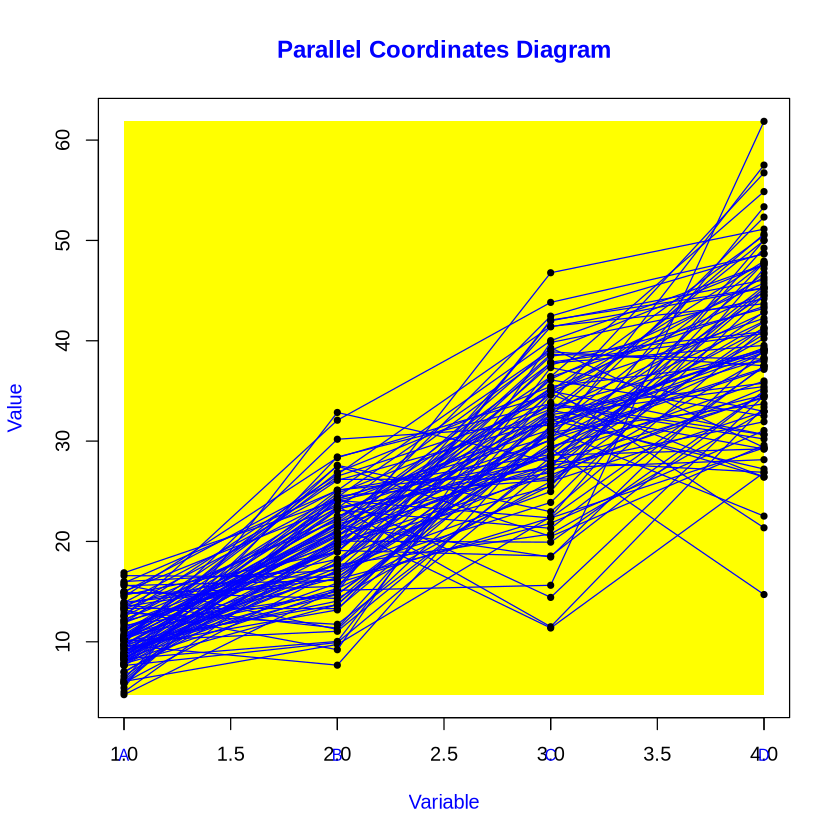

In [146]:
# PARALELL COORDINATES DIAGRAM


# Skapar diagrammet i R-Base

data <- data.frame(
  A = rnorm(100, 10, 3),
  B = rnorm(100, 20, 5),
  C = rnorm(100, 30, 7),
  D = rnorm(100, 40, 9)
)

# Skapa en tom plott med blå färg och gul bakgrund
plot(1, type = "n", xlim = c(1, ncol(data)), ylim = range(data), xlab = "Variable", ylab = "Value", main = "Parallel Coordinates Diagram", col.main = "blue", col.lab = "blue")

# Rita en rektangel som representerar diagramytan och färga den gul
rect(1, min(data), ncol(data), max(data), col = "yellow", border = NA)

# Lägg till linjer och punkter för varje observation
for (i in 1:nrow(data)) {
  lines(1:ncol(data), data[i,], type = "l", lty = 1, col = "blue")
  points(1:ncol(data), data[i,], pch = 20, col = 1)
}

# Lägg till x-axelns etiketter med mindre typsnitt
axis(1, at = 1:ncol(data), labels = colnames(data), col.axis = "blue", cex.axis = 0.8)

         
text<-'Ett Parallel Coordinates diagram är en typ av diagram som används för att visualisera relationer mellan flera numeriska variabler. Varje variabel representeras av en vertikal axel och värdena för varje observation ritas som linjer som korsar dessa axlar. Genom att jämföra formen och lutningen på linjerna kan man få insikt i mönster och relationer mellan variablerna. Det resulterande Parallel Coordinates-diagrammet visar mönster och relationer mellan de fyra variablerna genom att jämföra formen och lutningen på linjerna. Det kan vara användbart för att upptäcka korrelationer och kluster i dataset med flera variabler. I detta exempel skapar vi ett dataset med fyra numeriska variabler (A, B, C, D). Sedan använder vi ggplot2 för att skapa ett Parallel Coordinates-diagram med dessa variabler. Vi använder aes() för att ange  variablerna på x-axeln (1 till 4) och värdena för varje variabel på y-axeln.  geom_line(): används för att rita linjerna som representerar observationerna. geom_point() används för att lägga till punkter längs linjerna för att göra diagrammet mer läsbart. scale_color_manual() används för att definiera färger för varje observation. Slutligen anpassar vi etiketter och tema för att förbättra diagrammets presentation.'
text


[1] "Paretodiagrammet ger en grafisk representation för att visa den kumulativa procentandelen av en uppsättning av kategoriserade data. I detta fall ett diagram över fel per fordon i mtcars-datasetet. Genom att använda Pareto-diagrammet kan vi visuellt identifiera de fordon som bidrar mest till den totala felmängden för att  fokusera resurser på att åtgärda de viktigaste problemen först."

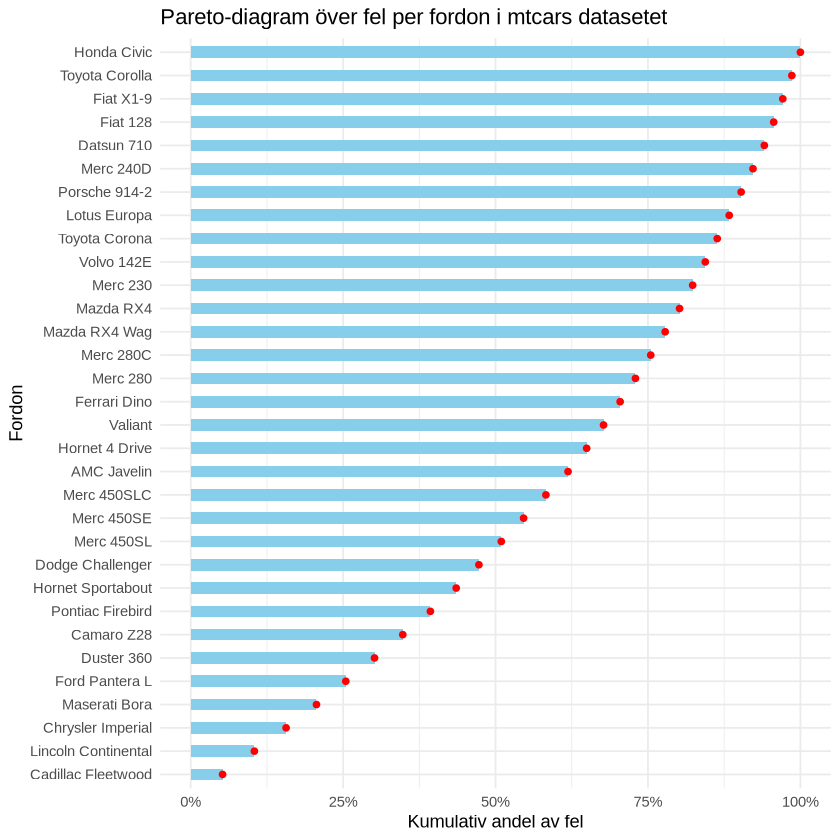

In [95]:
#PARETODIAGRAM


# Ladda in paket
library(ggplot2)

# Skapa en dataram för mtcars datasetet
mtcars_df <- mtcars

# Beräkna totalt antal fel per fordon
mtcars_df$total_errors <- rowSums(mtcars_df[, c("mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb")])

# Sortera fordonen efter antal fel i fallande ordning
mtcars_df <- mtcars_df[order(mtcars_df$total_errors, decreasing = TRUE), ]

# Skapa en kumulativ summa av fel
mtcars_df$cumulative_errors <- cumsum(mtcars_df$total_errors)

# Beräkna den totala summan av fel
total_errors <- sum(mtcars_df$total_errors)

# Skapa en variabel för den proportionella kumulativa summan
mtcars_df$cumulative_errors_proportion <- mtcars_df$cumulative_errors / total_errors

# Skapa ett Pareto-diagram
ggplot(mtcars_df, aes(x = reorder(row.names(mtcars_df), -total_errors), y = cumulative_errors_proportion)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  geom_point(color = "red") + # Använd geom_point istället för geom_line
  scale_y_continuous(labels = scales::percent) +
  coord_flip() +
  labs(title = "Pareto-diagram över fel per fordon i mtcars datasetet",
       x = "Fordon",
       y = "Kumulativ andel av fel") +
  theme_minimal()

text<-'Paretodiagrammet ger en grafisk representation för att visa den kumulativa procentandelen av en uppsättning av kategoriserade data. I detta fall ett diagram över fel per fordon i mtcars-datasetet. Genom att använda Pareto-diagrammet kan vi visuellt identifiera de fordon som bidrar mest till den totala felmängden för att  fokusera resurser på att åtgärda de viktigaste problemen först.'
text


[1] "Diagrammet är ett pictogram-chart som visar olika kategorier här representerade av diamanter, där varje diamant representerar ett antal enheter i varje kategori.Diagrammet avser att ge en visuell representation av fördelningen av värden över olika kategorier på ett sätt som är lätt att förstå och jämföra."

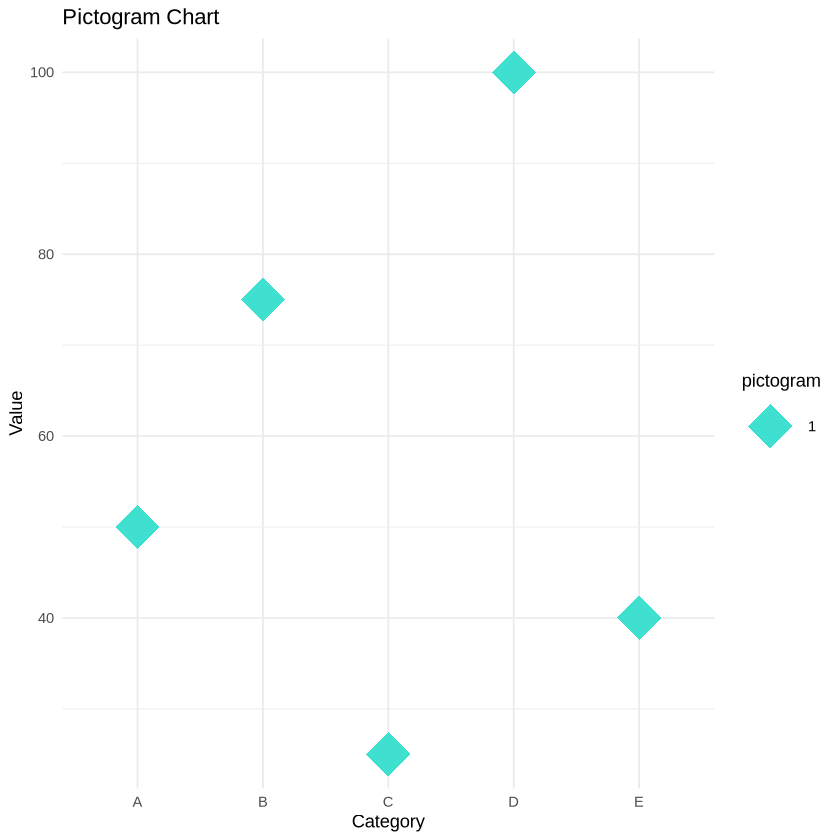

In [96]:
#PICTOGRAM CHART

# Ladda in paket
library(ggplot2)

# Skapa data för pictogram chart
pictogram_data <- data.frame(
  category = c("A", "B", "C", "D", "E"),
  value = c(10, 15, 5, 20, 8) # Antal "pictograms" för varje kategori
)

# Skapa en kolumn som representerar ett "pictogram" för varje enhet
pictogram_data$pictogram <- 1

# Skapa en variabel för antal "pictograms" för varje kategori
pictogram_data$pictogram_value <- pictogram_data$value / max(pictogram_data$value) * 100

# Skapa ett pictogram chart
ggplot(pictogram_data, aes(x = category, y = pictogram_value)) +
  geom_point(aes(size = pictogram), shape = 'diamond', color = "turquoise") +
  scale_size_continuous(range = c(5, 15)) +
  labs(title = "Pictogram Chart", x = "Category", y = "Value") +
  theme_minimal()

text<- 'Diagrammet är ett pictogram-chart som visar olika kategorier här representerade av diamanter, där varje diamant representerar ett antal enheter i varje kategori.Diagrammet avser att ge en visuell representation av fördelningen av värden över olika kategorier på ett sätt som är lätt att förstå och jämföra.'
text


[1] "I R används polygoner för att visualisera geografiska områden eller geometriska former. Genom att definiera punkter och kanter kan polygoner skapas och användas för att representera olika geografiska funktioner, såsom administrativa gränser, vägkartor eller geografiska egenskaper."

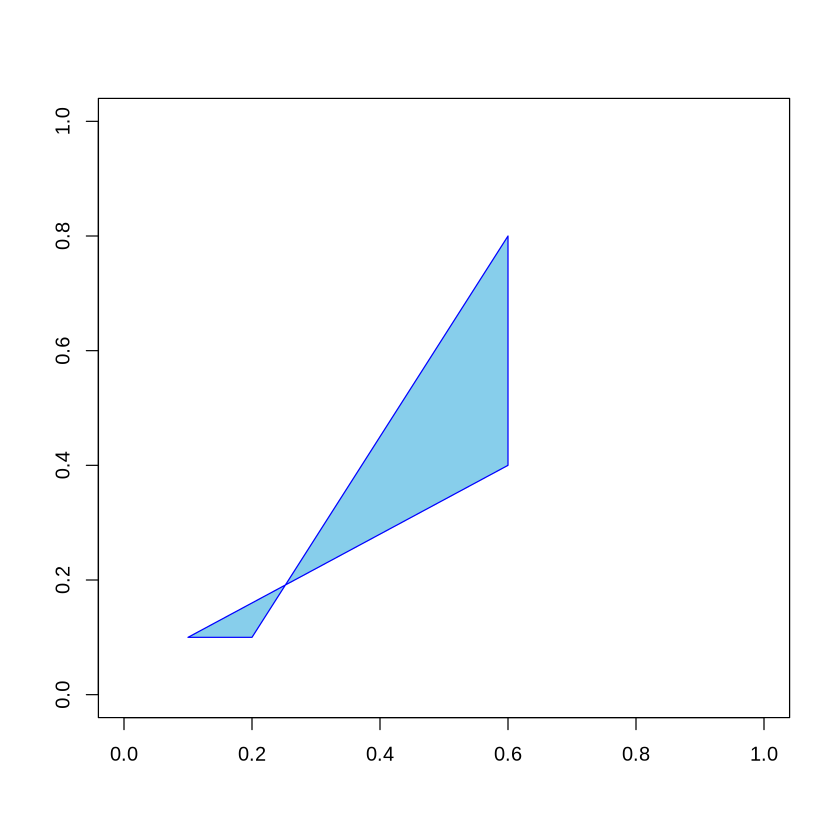

In [97]:
#POLYGONS


# Skapa en ny grafikruta
plot.new()

# Skapa polygonkoordinaterna
x <- c(0.1, 0.6, 0.6, 0.2)
y <- c(0.1, 0.4, 0.8, 0.1)

# Rita polygonet
polygon(x, y, col = "skyblue", border = "blue")

# Lägg till axlar och skala
axis(1)
axis(2)
box()

text<- 'I R används polygoner för att visualisera geografiska områden eller geometriska former. Genom att definiera punkter och kanter kan polygoner skapas och användas för att representera olika geografiska funktioner, såsom administrativa gränser, vägkartor eller geografiska egenskaper.'
text

[1] "I det här exemplet skapar vi slumpmässiga data för x- och y-variablerna och grupperar dem slumpmässigt. Sedan skapar vi ett punktdiagram med ggplot2 där varje grupp representeras av en annan färg. Vi använder geom_point() för att rita punkterna, justerar storleken och använder en anpassad färgskala med scale_color_manual(). Slutligen lägger vi till ett minimalistisk tema med theme_minimal() och lägger till etiketter för titel och axlar med labs()."

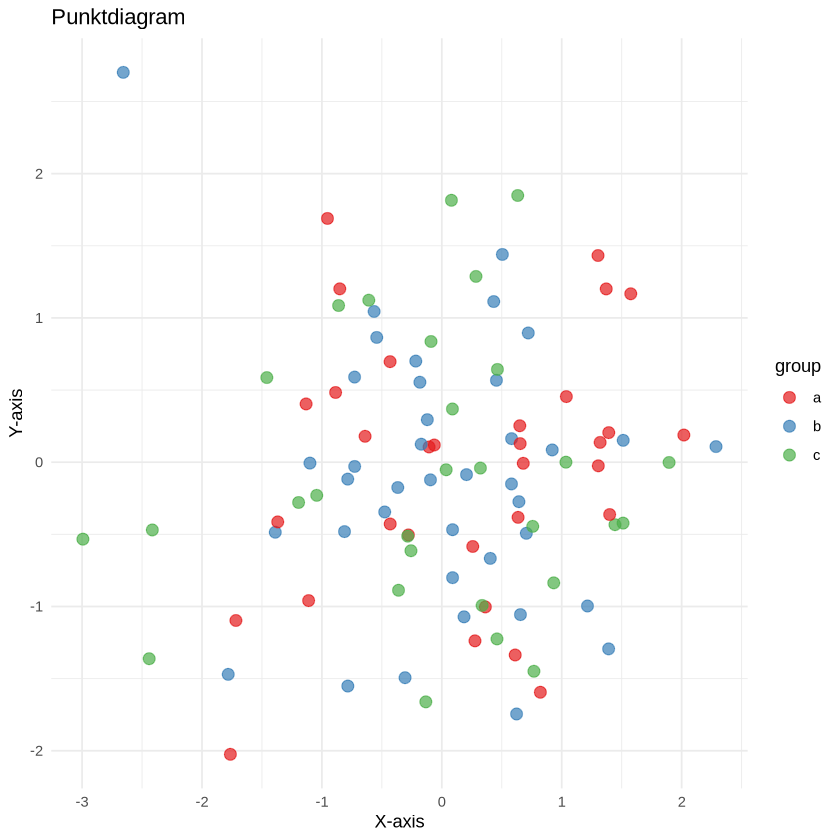

In [98]:
#PUNKTDIAGRAM


# Ladda in paket
library(ggplot2)

# Skapa exempeldata
set.seed(42)
data <- data.frame(
  x = rnorm(100),
  y = rnorm(100),
  group = sample(letters[1:3], 100, replace = TRUE)
)

# Skapa ett vackert punktdiagram
ggplot(data, aes(x = x, y = y, color = group)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("#E41A1C", "#377EB8", "#4DAF4A")) +
  theme_minimal() +
  labs(title = "Punktdiagram", x = "X-axis", y = "Y-axis")

text<- 'I det här exemplet skapar vi slumpmässiga data för x- och y-variablerna och grupperar dem slumpmässigt. Sedan skapar vi ett punktdiagram med ggplot2 där varje grupp representeras av en annan färg. Vi använder geom_point() för att rita punkterna, justerar storleken och använder en anpassad färgskala med scale_color_manual(). Slutligen lägger vi till ett minimalistisk tema med theme_minimal() och lägger till etiketter för titel och axlar med labs().'
text

[1] "En typ av punktdiagram där varje datapunkt representeras av en punkt på en koordinatplan, där x-axeln representerar en variabel och y-axeln representerar en annan variabel. Funktionen moxbuller genererar ett dataset med två variabler x och y genom att använda en speciell metod för slumpmässiga värden, känd som Box-Muller transform. Sedan plottas datapunkterna på en scatterplot genom att använda plot()-funktionen. En lista r skapas som innehåller variablerna x och y. Funktionen plot() används för att skapa en scatterplot av x mot y. Parametrarna pch=. och col=green används för att definiera formen och färgen på punkterna i diagrammet, medan cex=1.2 används för att justera storleken på punkterna.Diagrammet har inga marginaler, vilket resulterar i ett plot utan axlar eller omgivande ramar."

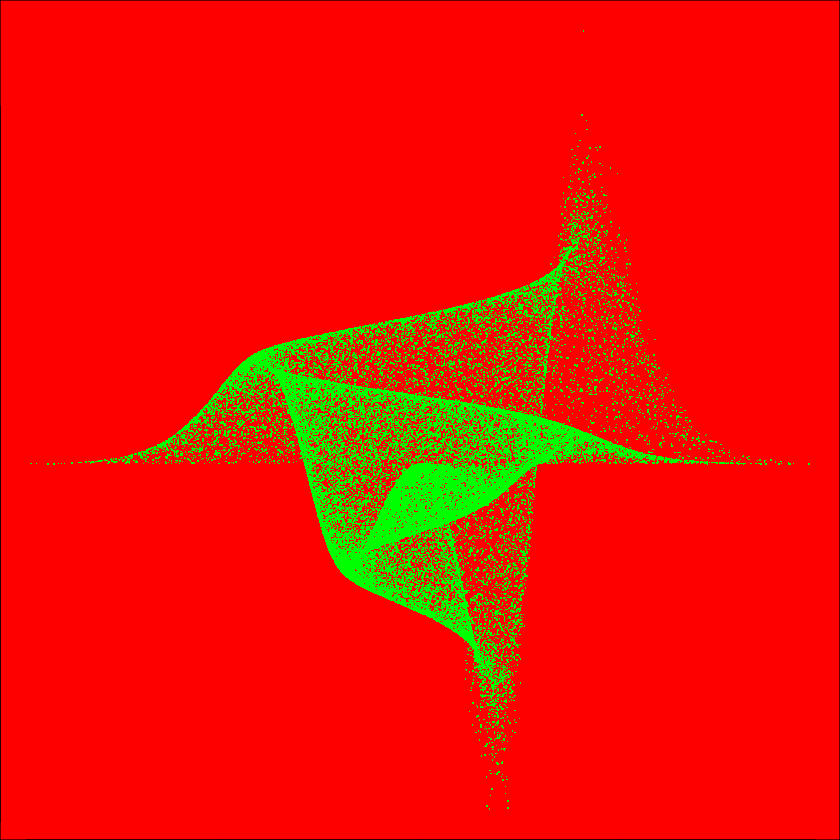

In [99]:
# PUNKTDIAGRAM SCATTER PLOT (Box-Muller transform)


moxbuller = function(n) {   
  u = runif(n)   
  v = runif(n)   
  x = cos(2*pi*u)*sqrt(-2*log(v))  
  y = sin(2*pi*v)*sqrt(-2*log(u))
  r = list(x=x, y=y)
  return(r) 
}
r = moxbuller(50000) 
par(bg="red") 
par(mar=c(0,0,0,0)) 
plot(r$x,r$y, pch=".", col="green", cex=1.2)


text<- 'En typ av punktdiagram där varje datapunkt representeras av en punkt på en koordinatplan, där x-axeln representerar en variabel och y-axeln representerar en annan variabel. Funktionen moxbuller genererar ett dataset med två variabler x och y genom att använda en speciell metod för slumpmässiga värden, känd som Box-Muller transform. Sedan plottas datapunkterna på en scatterplot genom att använda plot()-funktionen. En lista r skapas som innehåller variablerna x och y. Funktionen plot() används för att skapa en scatterplot av x mot y. Parametrarna pch=. och col=green används för att definiera formen och färgen på punkterna i diagrammet, medan cex=1.2 används för att justera storleken på punkterna.Diagrammet har inga marginaler, vilket resulterar i ett plot utan axlar eller omgivande ramar.'
text


[1] "I detta exempel skapar vi en QQ-plot för att jämföra den observerade kvantilen (på y-axeln) med den teoretiska kvantilen för en normalfördelning (på x-axeln). Vi skapar en funktion, theoretical_quantile(), för att beräkna den teoretiska kvantilen för en normalfördelning med hjälp av qnorm(). Sedan använder vi ggplot() tillsammans med stat_qq() för att rita QQ-plotten och geom_abline() för att lägga till en linje som representerar en idealisk matchning mellan den teoretiska och observerade kvantilen."

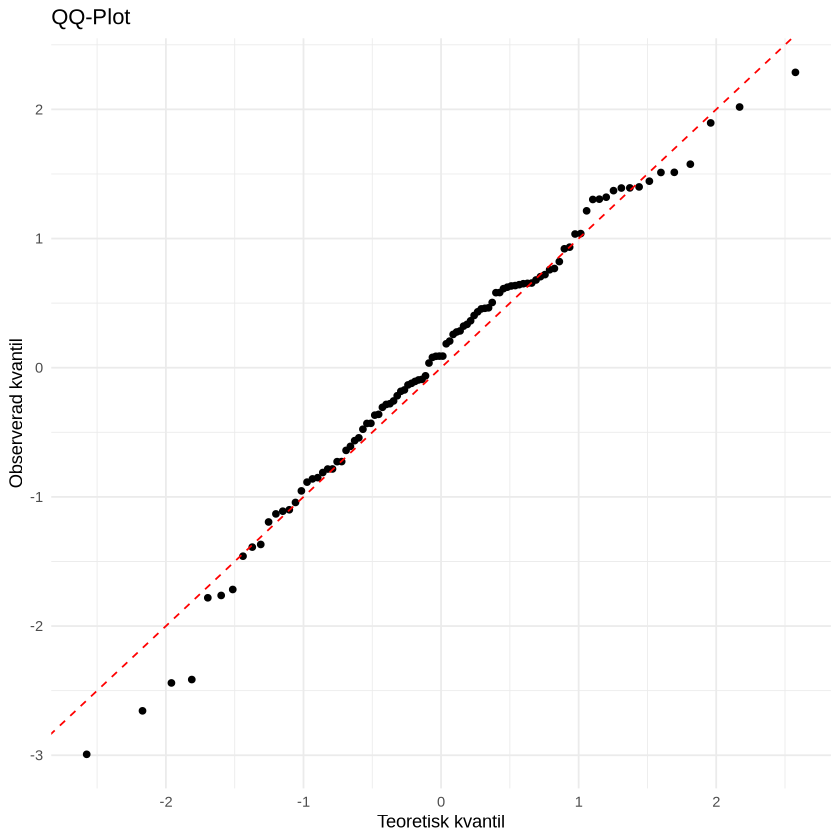

In [100]:
# QQ PLOT

# Ladda in paket
library(ggplot2)

# Skapa exempeldata från en normalfördelning
set.seed(42)
data <- rnorm(100)

# Skapa en funktion för den teoretiska kvantilen för en normalfördelning
theoretical_quantile <- function(p) qnorm(p)

# Skapa QQ-plot
ggplot(data.frame(x = data), aes(sample = x)) +
  stat_qq(distribution = theoretical_quantile) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "QQ-Plot", x = "Teoretisk kvantil", y = "Observerad kvantil") +
  theme_minimal()

text<- 'I detta exempel skapar vi en QQ-plot för att jämföra den observerade kvantilen (på y-axeln) med den teoretiska kvantilen för en normalfördelning (på x-axeln). Vi skapar en funktion, theoretical_quantile(), för att beräkna den teoretiska kvantilen för en normalfördelning med hjälp av qnorm(). Sedan använder vi ggplot() tillsammans med stat_qq() för att rita QQ-plotten och geom_abline() för att lägga till en linje som representerar en idealisk matchning mellan den teoretiska och observerade kvantilen.'
text


[1] "Diagrammet används för att visa flera variabler för en enda observation. I detta specifika diagram representeras fem olika kategorier (A, B, C, D, E) längs den radieformade axeln. För varje kategori visas ett värde längs axeln, vilket  representeras av punkter på diagrammet.Varje punkt representerar värdet för en variabel inom en kategori.Diagrammet är orienterat i en cirkulär form med startpunkten vid 12:00 och kategorierna följer medurs längs den cirkulära axeln. Med detta diagram kan vi visuellt jämföra värdena för varje kategori och observera deras relation och fördelning."

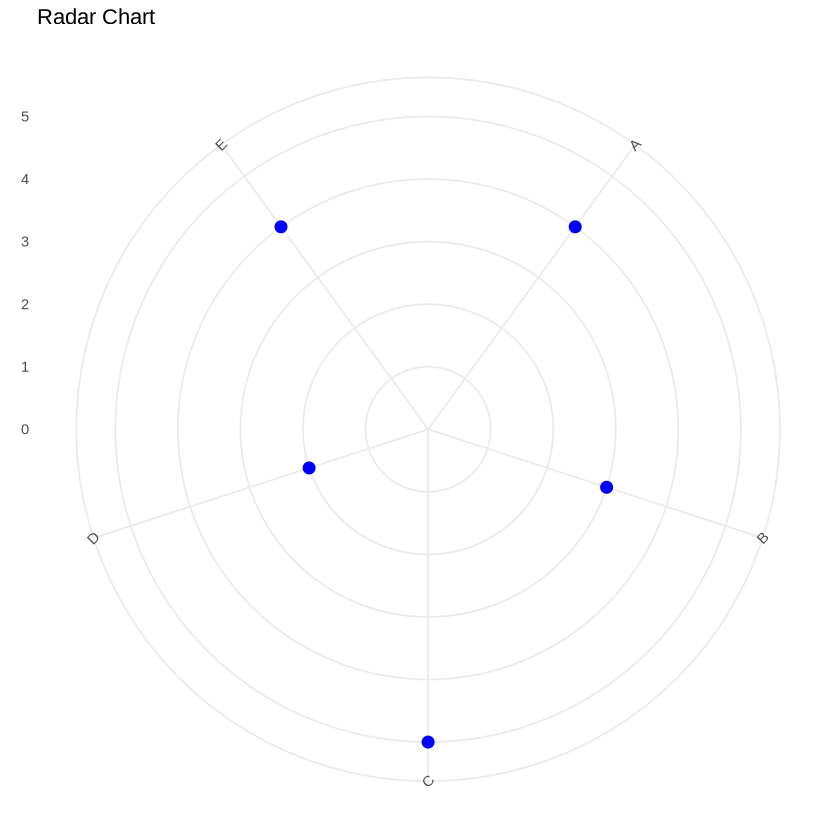

In [101]:
# RADAR CHART


# Ladda in paket
library(ggplot2)

# Skapa exempeldata för radar chart
data <- data.frame(
  Category = c("A", "B", "C", "D", "E"),
  Value = c(4, 3, 5, 2, 4)
)

# Skapa radar chart med punkter
ggplot(data, aes(x = Category, y = Value)) +
  geom_polygon(fill = "skyblue", color = "blue", linewidth = 2) +
  geom_point(color = "blue", size = 3) + # Använder geom_point istället för geom_path
  coord_polar(start = 0) +
  ylim(0, 5) +
  labs(title = "Radar Chart", x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


text<- 'Diagrammet används för att visa flera variabler för en enda observation. I detta specifika diagram representeras fem olika kategorier (A, B, C, D, E) längs den radieformade axeln. För varje kategori visas ett värde längs axeln, vilket  representeras av punkter på diagrammet.Varje punkt representerar värdet för en variabel inom en kategori.Diagrammet är orienterat i en cirkulär form med startpunkten vid 12:00 och kategorierna följer medurs längs den cirkulära axeln. Med detta diagram kan vi visuellt jämföra värdena för varje kategori och observera deras relation och fördelning.'
text


Picking joint bandwidth of 0.332



[1] "Ridgeline-plottar, också kända som joyplot eller ridge plots, är en datavisualiseringsmetod som används för att visa fördelningen av en numerisk variabel för olika grupper eller kategorier. Denna typ av plott kan vara särskilt användbar om man vill jämföra fördelningarna för flera grupper samtidigt. En ridgeline-plott består vanligtvis av flera smala linjer (ridges) staplade ovanpå varandra och färgkodade för att representera olika grupper eller kategorier. Det ger en visuell representation av fördelningen av den numeriska variabeln över dessa grupper. I det här exemplet skapar vi en datamängd med tre grupper (A, B, C) och en numerisk variabel Value som är slumpmässigt genererad för varje grupp. Sedan skapar vi en ridgeline-plott med ggplot()-funktionen där geom_density_ridges() används för att rita ridges baserat på fördelningen av Value för varje grupp. Fill-argumentet används för att färgkoda ridges baserat på grupp."

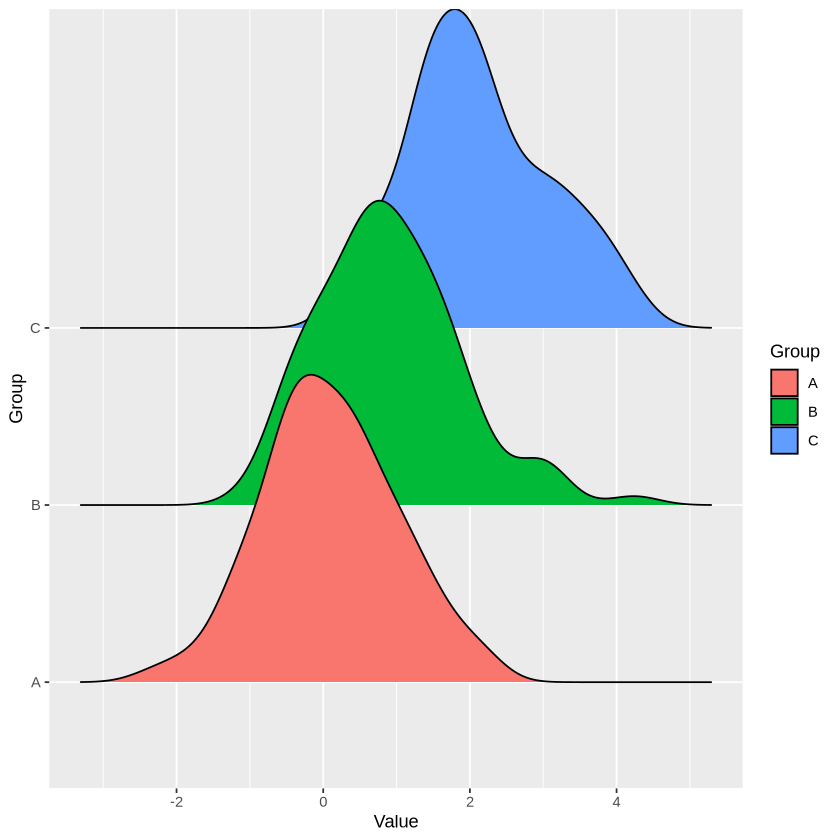

In [102]:
# RIDGLINE PLOT (Joyplot)

# Installera och ladda in ggridges-paketet
install.packages("ggridges")
library(ggridges)

# Skapa exempeldatamängd
set.seed(123)
data <- data.frame(
  Group = rep(LETTERS[1:3], each = 100),
  Value = c(rnorm(100), rnorm(100, mean = 1), rnorm(100, mean = 2))
)

# Skapa ridgeline-plott
ggplot(data, aes(x = Value, y = Group, fill = Group)) +
  geom_density_ridges()

text <-'Ridgeline-plottar, också kända som joyplot eller ridge plots, är en datavisualiseringsmetod som används för att visa fördelningen av en numerisk variabel för olika grupper eller kategorier. Denna typ av plott kan vara särskilt användbar om man vill jämföra fördelningarna för flera grupper samtidigt. En ridgeline-plott består vanligtvis av flera smala linjer (ridges) staplade ovanpå varandra och färgkodade för att representera olika grupper eller kategorier. Det ger en visuell representation av fördelningen av den numeriska variabeln över dessa grupper. I det här exemplet skapar vi en datamängd med tre grupper (A, B, C) och en numerisk variabel Value som är slumpmässigt genererad för varje grupp. Sedan skapar vi en ridgeline-plott med ggplot()-funktionen där geom_density_ridges() används för att rita ridges baserat på fördelningen av Value för varje grupp. Fill-argumentet används för att färgkoda ridges baserat på grupp.'
text

[1] "Ett Sankey-diagram är en typ av flödesdiagram som används för att visualisera flöden och relationer mellan olika komponenter eller kategorier. Det är särskilt användbart för att visa hur en viss mängd något fördelas eller överförs mellan olika kategorier eller steg i ett system. Sankey-diagrammet består av rektangulära block, kända som noder, som representerar de olika komponenterna eller kategorierna. Bredden på varje block motsvarar storleken på flödet eller värdet av komponenten. Flödena mellan blocken representeras av linjer, vars bredd proportionellt motsvarar mängden av flödet som överförs mellan de olika kategorierna. Sankey-diagrammet kan användas för att visa flera typer av flöden och relationer, inklusive energiflöden, ekonomiska flöden, trafikflöden, informationsflöden och mycket mer. Det ger en intuitiv och visuell representation av komplexa relationer och kan användas för att identifiera mönster."

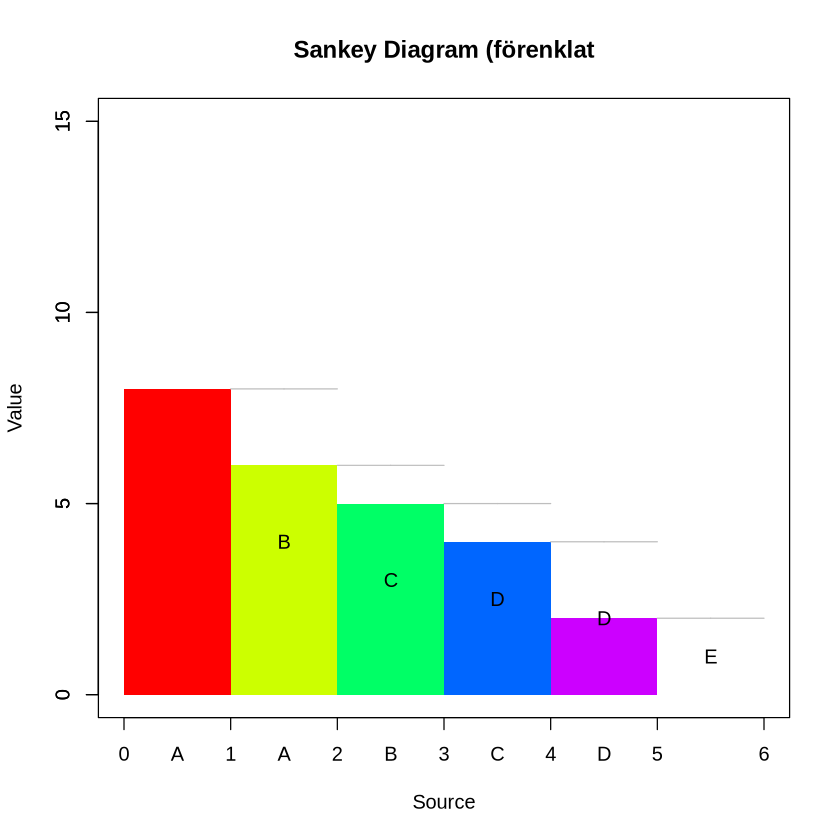

In [153]:
# SANKEY DIAGRAM

text<- 'Ett Sankey-diagram är en typ av flödesdiagram som används för att visualisera flöden och relationer mellan olika komponenter eller kategorier. Det är särskilt användbart för att visa hur en viss mängd något fördelas eller överförs mellan olika kategorier eller steg i ett system. Sankey-diagrammet består av rektangulära block, kända som noder, som representerar de olika komponenterna eller kategorierna. Bredden på varje block motsvarar storleken på flödet eller värdet av komponenten. Flödena mellan blocken representeras av linjer, vars bredd proportionellt motsvarar mängden av flödet som överförs mellan de olika kategorierna. Sankey-diagrammet kan användas för att visa flera typer av flöden och relationer, inklusive energiflöden, ekonomiska flöden, trafikflöden, informationsflöden och mycket mer. Det ger en intuitiv och visuell representation av komplexa relationer och kan användas för att identifiera mönster.'
text

#Försöker skapa diagrammet med plotly-paketet

# Dölj varningsmeddelanden och meddelanden vid start av paket
  #suppressWarnings({
  #suppressMessages({
    #install.packages("plotly")
    #library(plotly)
   #})

# Skapa ett Sankey-diagram i plotly
#data <- data.frame(
  #Source = c("A", "A", "B", "C", "D"),
  #Target = c("B", "C", "D", "D", "E"),
  #Value = c(8, 6, 5, 4, 2)
#)

# Skapa Sankey-diagrammet med plotly
#fig <- plot_ly(data, type = "sankey", arrangement = "snap",
               #node = list(label = c("A", "B", "C", "D", "E")),
               #link = list(source = ~Source, target = ~Target, value = ~Value))

# Ange layout och rubrik
#fig <- fig %>% layout(title = "Sankey Diagram")

# Visa diagrammet
#fig
      
#})     


# Skapa ett fiktivt Sankey-diagram i R-Base
data <- data.frame(
  Source = c("A", "A", "B", "C", "D"),
  Target = c("B", "C", "D", "D", "E"),
  Value = c(8, 6, 5, 4, 2)
)

# Skapa en tom plott med titel, rubrik och axlar
plot(NULL, xlim = c(0, 6), ylim = c(0, 15), xlab = "Source", ylab = "Value", main = "Sankey Diagram (förenklat")

# Rita staplarna
barplot(data$Value, names.arg = data$Source, col = rainbow(nrow(data)), border = NA, space = 0, add = TRUE)

# Rita linjerna för flödet
for (i in 1:nrow(data)) {
  lines(c(i, i+0.5), c(data$Value[i], data$Value[i]), col = "grey")
  lines(c(i+0.5, i+1), c(data$Value[i], data$Value[i]), col = "grey")
}

# Lägg till text för målet
text(1.5, data$Value[1] / 2, data$Target[1], col = "black")
text(2.5, data$Value[2] / 2, data$Target[2], col = "black")
text(3.5, data$Value[3] / 2, data$Target[3], col = "black")
text(4.5, data$Value[4] / 2, data$Target[4], col = "black")
text(5.5, data$Value[5] / 2, data$Target[5], col = "black")


[1] "Smith chart är ett cirkulärt diagram som används inom området för mikrovågsteknik och RF-design för att visualisera komplexa impedansmatchningsproblem och reflektionskoefficienter. Smith-diagrammet används främst för att analysera och designa kretsar som är anpassade till en viss impedans. Det är särskilt användbart för att förstå och optimera antennsystem, transmissionslinjer och andra RF-komponenter. I ett Smith-diagram  representeras alla möjliga komplexa impedanser som är anslutna till en viss impedans som punkter på en cirkel. Den reella delen av impedansen representeras längs den horisontella axeln och den imaginära delen längs den vertikala axeln. Genom att använda Smith-diagrammet kan  man enkelt visualisera komplexa impedanser, anpassningsproblem och reflektionskoefficienter. Det kan också användas för att hitta bästa matchningen för att maximera effektöverföringen mellan två komponenter, såsom mellan en antenn och en transmissionslinje."

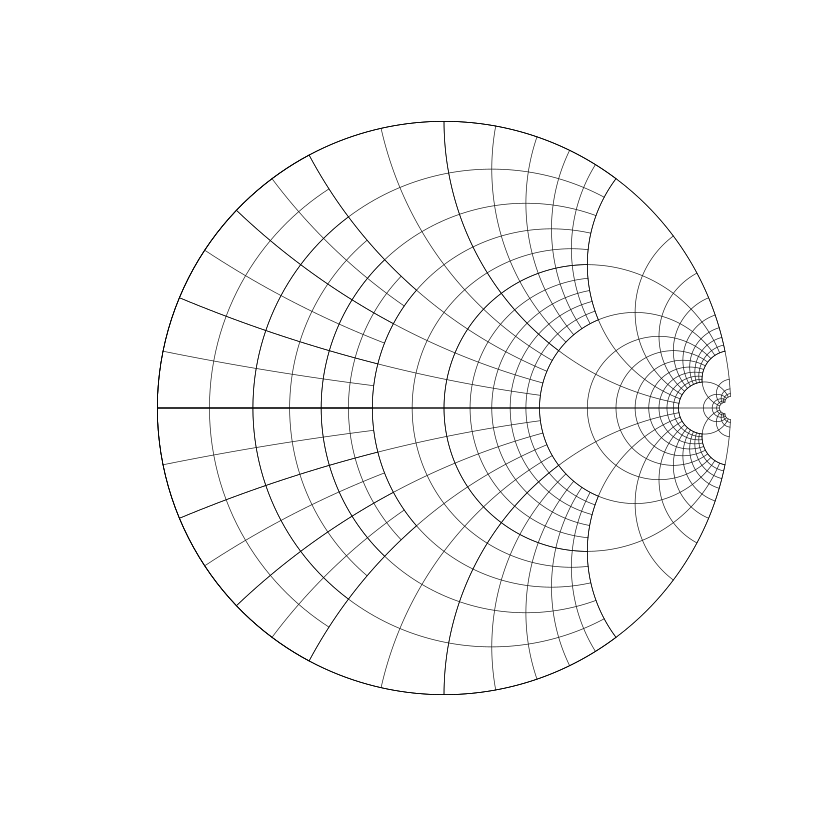

In [103]:
#SMITH CHART


cmap <- function(z) (z-1)/(z+1)

plot.new()
plot.window(c(-1, 1), c(-1, 1), asp = 1)

dd <- c(seq(-100, 100, 1), seq(-10, 10, 0.1), seq(-2, 2, 0.02))
dd <- round(dd, digits = 2) # avrundar
dd <- sort(unique(dd)) # tar bort dubbletter

smith_grid <- function (val, step) {
  # tillämpar konform karta på linjer med fast reell komponent
  r_grid <- outer(1i * dd[dd >= -val & dd <= val], seq(0, val, step), '+')
  r_grid <- cmap(r_grid)
  matlines(Re(r_grid), Im(r_grid), lwd = 0.5, col = 1, lty = 1)
  
  # tillämpar konform karta på linjer som har fast imaginär komponent
  x_grid <- outer(dd[dd >= 0 & dd <= val], 1i * seq(-val, val, step), '+')
  x_grid <- cmap(x_grid)
  matlines(Re(x_grid), Im(x_grid), lwd = 0.5, col = 1, lty = 1)
}

smith_grid(50, 10)
smith_grid(10, 1)
smith_grid(2, 0.2)
smith_grid(0.6, 0.1)

text<- 'Smith chart är ett cirkulärt diagram som används inom området för mikrovågsteknik och RF-design för att visualisera komplexa impedansmatchningsproblem och reflektionskoefficienter. Smith-diagrammet används främst för att analysera och designa kretsar som är anpassade till en viss impedans. Det är särskilt användbart för att förstå och optimera antennsystem, transmissionslinjer och andra RF-komponenter. I ett Smith-diagram  representeras alla möjliga komplexa impedanser som är anslutna till en viss impedans som punkter på en cirkel. Den reella delen av impedansen representeras längs den horisontella axeln och den imaginära delen längs den vertikala axeln. Genom att använda Smith-diagrammet kan  man enkelt visualisera komplexa impedanser, anpassningsproblem och reflektionskoefficienter. Det kan också användas för att hitta bästa matchningen för att maximera effektöverföringen mellan två komponenter, såsom mellan en antenn och en transmissionslinje.'
text

[1] "I detta exempel skapar vi ett enkelt stapeldiagram med fyra kategorier (A, B, C, D) och två staplade värden (Value1, Value2). Vi omvandlar först data från wide till long format för att passa ggplot2s datastruktur. Sedan använder vi geom_bar() för att rita staplarna, och position = \"stack\" för att  stapla värdena på varandra. Sammanfattningsvis används stapeldiagram främst för att jämföra kategoriska data och deras förhållande till en helhet, medan histogram används för att visualisera fördelningen av kontinuerliga numeriska data."

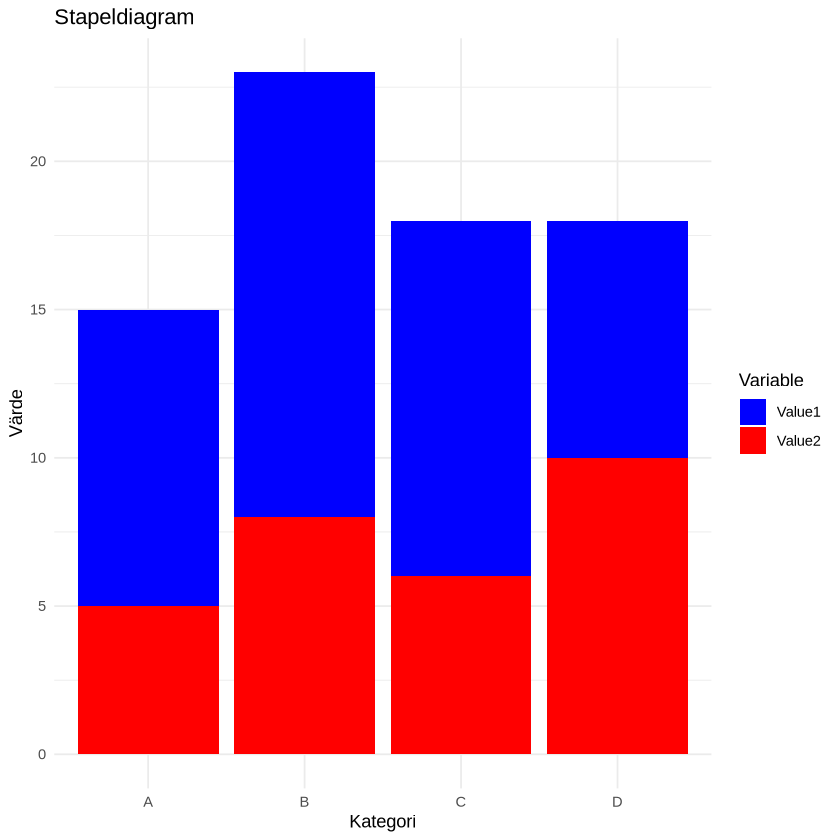

In [104]:
# STAPELDIAGRAM

# Ladda in paketet
library(ggplot2)

# Skapa exempeldata för stapeldiagram
data <- data.frame(
  Category = c("A", "B", "C", "D"),
  Value1 = c(10, 15, 12, 8),
  Value2 = c(5, 8, 6, 10)
)

# Omvandla data från wide till long format för ggplot2
data_long <- tidyr::pivot_longer(data, cols = starts_with("Value"), names_to = "Variable", values_to = "Value")

# Skapa stapeldiagrammet
ggplot(data_long, aes(x = Category, y = Value, fill = Variable)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Stapeldiagram", x = "Kategori", y = "Värde") +
  scale_fill_manual(values = c("Value1" = "blue", "Value2" = "red")) +
  theme_minimal()

text<- 'I detta exempel skapar vi ett enkelt stapeldiagram med fyra kategorier (A, B, C, D) och två staplade värden (Value1, Value2). Vi omvandlar först data från wide till long format för att passa ggplot2s datastruktur. Sedan använder vi geom_bar() för att rita staplarna, och position = "stack" för att  stapla värdena på varandra. Sammanfattningsvis används stapeldiagram främst för att jämföra kategoriska data och deras förhållande till en helhet, medan histogram används för att visualisera fördelningen av kontinuerliga numeriska data.'
text


[1] "För att skapa ett Candlestick-diagram i R kan vi använda paketet quantmod. Detta paket tillåter oss att hämta finansiella data från olika källor och skapa Candlestick-diagram för dessa data. Detta kommer att hämta aktiedata för Apple (AAPL) från Yahoo Finance från 1 januari 2022 fram till dagens datum och skapa ett Candlestick-diagram för dessa data. Man kan ändra tickersymbolen (\"AAPL\") och datumintervallet efter behov för att hämta och visualisera data för andra företag och perioder."

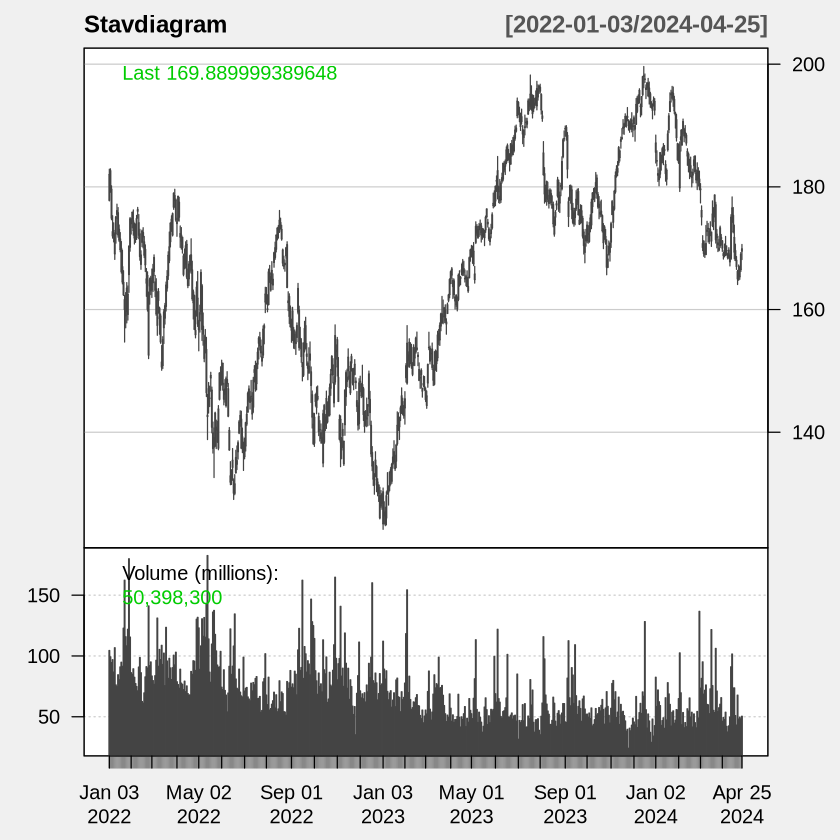

In [119]:
# STAVDIAGRAM (Candlestick-diagram) 

suppressWarnings({
  suppressMessages({
    install.packages("quantmod")
    library(quantmod)
  })
  
  # Hämta data från Yahoo Finance (exempelvis Apple-aktier)
  getSymbols("AAPL", from = "2022-01-01", to = Sys.Date())
  
  # Skapa Candlestick-diagram med titeln "Frank"
  chartSeries(AAPL, type="candlesticks", theme="white", name="Stavdiagram")
  
})
    
text<- 'För att skapa ett Candlestick-diagram i R kan vi använda paketet quantmod. Detta paket tillåter oss att hämta finansiella data från olika källor och skapa Candlestick-diagram för dessa data. Detta kommer att hämta aktiedata för Apple (AAPL) från Yahoo Finance från 1 januari 2022 fram till dagens datum och skapa ett Candlestick-diagram för dessa data. Man kan ändra tickersymbolen ("AAPL") och datumintervallet efter behov för att hämta och visualisera data för andra företag och perioder.' 
text

[1] "Ett streamgraph-diagram bygger på en datavisualiseringsteknik som används för att visa förändringar i fördelningen av data över en tidsperiod. Det är en variant av ett area-diagram där data staplas ovanpå varandra och fyller utrymmet under en kurva som representerar tidslinjen. Huvudsyftet med en streamgraph är att visa trender och mönster över tid för olika kategorier eller variabler. Varje kategori representeras av en färgad yta i diagrammet, och höjden på området vid varje tidpunkt representerar värdet av kategorin vid den tiden. Streamgraph-diagrammet är särskilt användbart för att visualisera förändringar i flera kategoriers bidrag till en helhet över tid. Diagrammet kan användas för att analysera och förstå hur fördelningen av data förändras över tid, och att identifiera mönster, trender och periodiska variationer. Streamgraph-diagrammet är ofta användbart inom områden som ekonomi (för att visualisera flöden av ekonomiska resurser över tid), klimatvetenskap (för att visualisera förändringar i vädermönster över säsonger), och sociala medier (för att  visualisera förändringar i användaraktivitet över tid)."

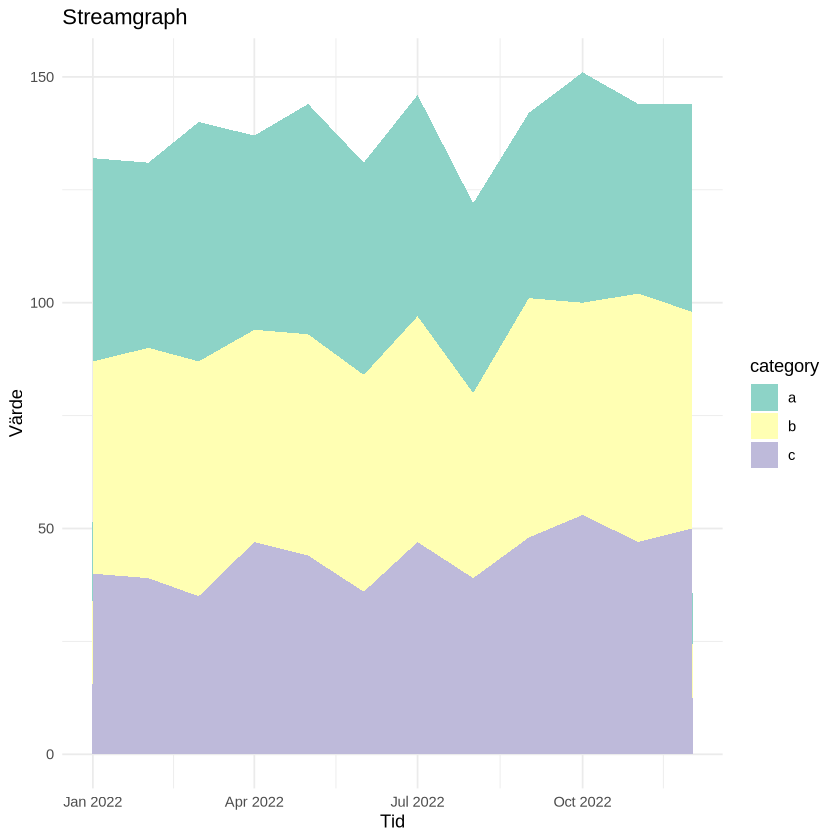

In [116]:
#STREAMGRAPH


# Dölj varningsmeddelanden och meddelanden vid start av paket

  suppressMessages({
    install.packages("ggplot2")
    library(ggplot2)
   })

set.seed(123)
data <- data.frame(
  time = rep(seq(as.Date("2022-01-01"), by = "month", length.out = 12), 3),
  category = rep(letters[1:3], each = 12),
  value = c(
    sample(10:20, 36, replace = TRUE),  # Uppdaterat för att tillåta ersättning
    sample(15:25, 36, replace = TRUE),  # Uppdaterat för att tillåta ersättning
    sample(5:15, 36, replace = TRUE)    # Uppdaterat för att tillåta ersättning
  )
)

# Beräkna stacked area
data <- aggregate(value ~ time + category, data = data, FUN = sum)
data <- data[order(data$time), ]
data <- transform(data, y_start = ave(value, time, FUN = function(x) c(0, head(cumsum(x), -1))))

# Skapa plot
ggplot(data, aes(x = time, y = value, fill = category)) +
  geom_area(position = "stack") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  labs(title = "Streamgraph", x = "Tid", y = "Värde")

text<- 'Ett streamgraphdiagram bygger på en datavisualiseringsteknik som används för att visa förändringar i fördelningen av data över en tidsperiod. Det är en variant av ett area-diagram där data staplas ovanpå varandra och fyller utrymmet under en kurva som representerar tidslinjen. Huvudsyftet med en streamgraph är att visa trender och mönster över tid för olika kategorier eller variabler. Varje kategori representeras av en färgad yta i diagrammet, och höjden på området vid varje tidpunkt representerar värdet av kategorin vid den tiden. Streamgraph-diagrammet är särskilt användbart för att visualisera förändringar i flera kategoriers bidrag till en helhet över tid. Diagrammet kan användas för att analysera och förstå hur fördelningen av data förändras över tid, och att identifiera mönster, trender och periodiska variationer. Streamgraph-diagrammet är ofta användbart inom områden som ekonomi (för att visualisera flöden av ekonomiska resurser över tid), klimatvetenskap (för att visualisera förändringar i vädermönster över säsonger), och sociala medier (för att  visualisera förändringar i användaraktivitet över tid).'
text

[1] "En ternär plot, även känd som triangelplot eller triplot, är en typ av diagram som används för att visualisera data för tre variabler inom en begränsad trehörning eller triangel. Det används vanligtvis när man vill visa förhållandet mellan tre variabler där summan av de tre variablerna är konstant. I en ternär plot representeras varje variabel av en av triangelns hörn, och  punkterna inuti triangeln representerar kombinationer av de tre variablerna. Triangelns hörn representerar rena variabler där en variabel är 100% och de andra två är 0%. Punkterna längs sidorna av triangeln representerar blandningar av två variabler, medan punkterna inuti representerar en blandning av alla tre variabler. Ternära plot används ofta inom olika vetenskapliga och tekniska områden för att visualisera data för tre sammankopplade variabler. Exempel på användningsområden inkluderar  geokemi (för att visa förhållandet mellan tre kemiska ämnen i en bergart), miljövetenskap (för att visualisera förhållandet  mellan tre typer av föroreningar i mark eller vatten) och materialvetenskap (för att visa förhållandet mellan tre komponenter  i en legering)."

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: package or namespace load failed for ‘ggtern’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘scales’ 1.2.1 is already loaded, but >= 1.3.0 is required


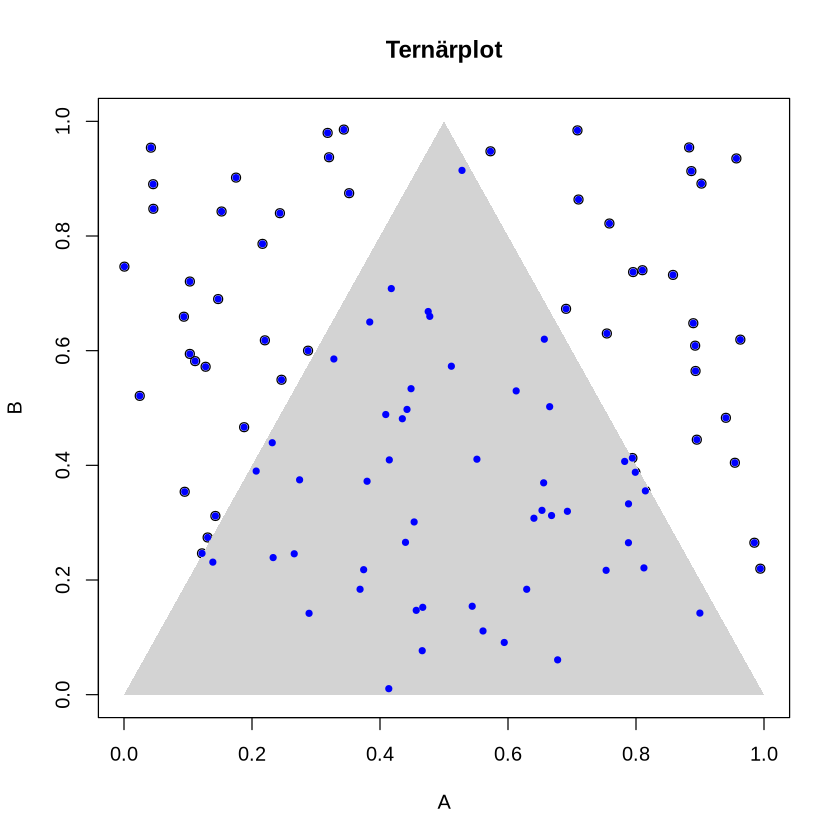

In [123]:
# TERNARY PLOT


text<- 'En ternär plot, även känd som triangelplot eller triplot, är en typ av diagram som används för att visualisera data för tre variabler inom en begränsad trehörning eller triangel. Det används vanligtvis när man vill visa förhållandet mellan tre variabler där summan av de tre variablerna är konstant. I en ternär plot representeras varje variabel av en av triangelns hörn, och  punkterna inuti triangeln representerar kombinationer av de tre variablerna. Triangelns hörn representerar rena variabler där en variabel är 100% och de andra två är 0%. Punkterna längs sidorna av triangeln representerar blandningar av två variabler, medan punkterna inuti representerar en blandning av alla tre variabler. Ternära plot används ofta inom olika vetenskapliga och tekniska områden för att visualisera data för tre sammankopplade variabler. Exempel på användningsområden inkluderar  geokemi (för att visa förhållandet mellan tre kemiska ämnen i en bergart), miljövetenskap (för att visualisera förhållandet  mellan tre typer av föroreningar i mark eller vatten) och materialvetenskap (för att visa förhållandet mellan tre komponenter  i en legering).'
text

#Enklare fall med ternär plot gjort i R_Base
set.seed(123)
A <- runif(100)
B <- runif(100)

# Skapa C från A och B
C <- 1 - (A + B)

# Kombinera A, B och C till en data.frame
data <- data.frame(A = A, B = B, C = C)

plot(data$A, data$B, xlim = c(0, 1), ylim = c(0, 1), xlab = "A", ylab = "B", main = "Ternärplot")
polygon(c(0, 1, 0.5), c(0, 0, 1), col = "lightgray", border = NA)
points(data$A, data$B, pch = 20, col = "blue")



# Skapa ternärplot med ggtern

# Installera och ladda nödvändiga paket
install.packages("ggtern")
library(ggtern)
suppressPackageStartupMessages(library(ggtern))


# Skapa slumpmässiga data för variablerna A och B
set.seed(123)
A <- runif(100)
B <- runif(100)

# Beräkna variabeln C baserat på A och B så att de summerar till 1
C <- 1 - (A + B)

# Skapa ternär plot med A, B och C som x, y och z-estetik
ggtern(data.frame(A, B, C), aes(x = A, y = B, z = C)) +
  geom_point() +
  theme_bw()




[1] "En treemap är en visualiseringstyp som används för att visa hierarkiska datastrukturer. Den visar hierarkin som en serie av rektangulära områden, där varje rektangel representerar en nod i hierarkin. Storleken på varje rektangel motsvarar en  numerisk eller kvantitativ variabel, och färgen kan användas för att ange en annan variabel. Treemaps är användbara för att visualisera och jämföra stora mängder data på ett överskådligt sätt. De är särskilt effektiva för att visa hierarkiska strukturer, såsom filsystem, organisationsstrukturer, eller ekonomiska data."

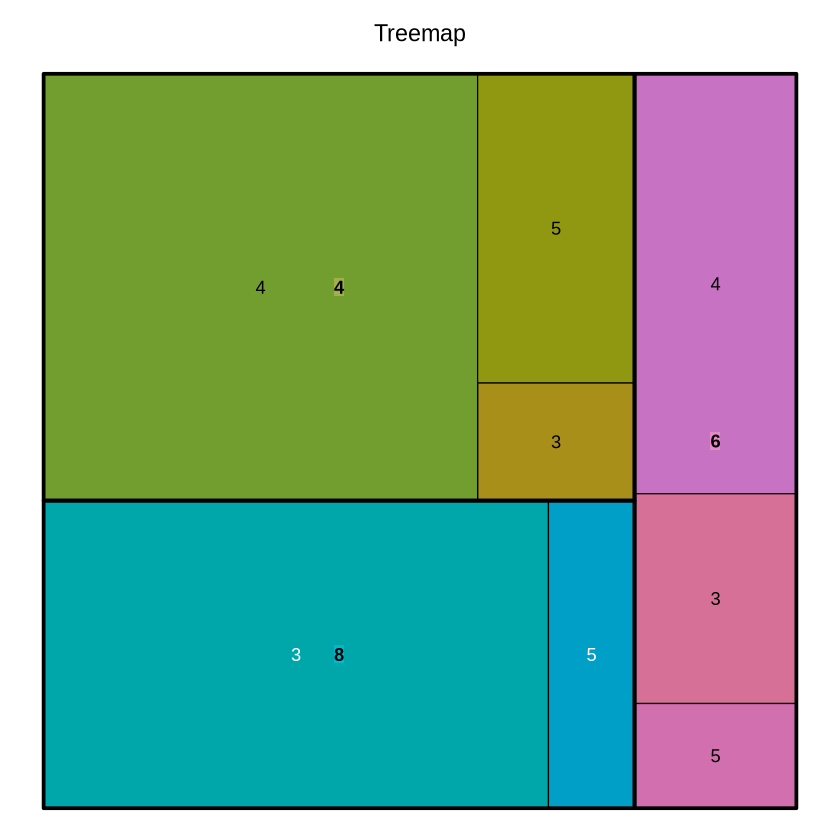

In [127]:
#TREEMAP


# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("treemap")
    library(treemap)
   })


# Create a dataset to use in treemap
data("mtcars")

# Create treemap
treemap(mtcars, 
        index=c("cyl", "gear"), 
        vSize="mpg", 
        vColor="wt",
        title="Treemap")
 })
text <- 'En treemap är en visualiseringstyp som används för att visa hierarkiska datastrukturer. Den visar hierarkin som en serie av rektangulära områden, där varje rektangel representerar en nod i hierarkin. Storleken på varje rektangel motsvarar en  numerisk eller kvantitativ variabel, och färgen kan användas för att ange en annan variabel. Treemaps är användbara för att visualisera och jämföra stora mängder data på ett överskådligt sätt. De är särskilt effektiva för att visa hierarkiska strukturer, såsom filsystem, organisationsstrukturer, eller ekonomiska data.'
text

[1] "En trädgraf är en typ av grafisk datastruktur som organiserar noder och kanter i en hierarkisk struktur som liknar ett träd i naturen. Varje nod representerar en punkt i grafen, och varje kant representerar en relation mellan noder. I en trädgraf har varje nod en överordnad nod (förutom rotnoden) och noll eller flera underordnade noder. Några viktiga egenskaper hos en trädgraf inkluderar: Rotnod (specifik nod i trädet som är rotens förälder och har inga föräldrar själv), Barnnod (noder som har en direkt förälder eller överordnad nod), Bladnoder (noder som inte har några barnnoder, vilket innebär att de är de yttersta noderna i trädet), Djup (antalet steg från rotnoden till en viss nod), Höjd (den längsta vägen från rotnoden till en lövnod). Trädgrafer är användbara för att modellera hierarkiska strukturer i data, såsom filsystem, organisationsträd, släktträd och många  andra tillämpningar. De tillåter också effektiv sökning, och hantering av data i en hierarkisk form."

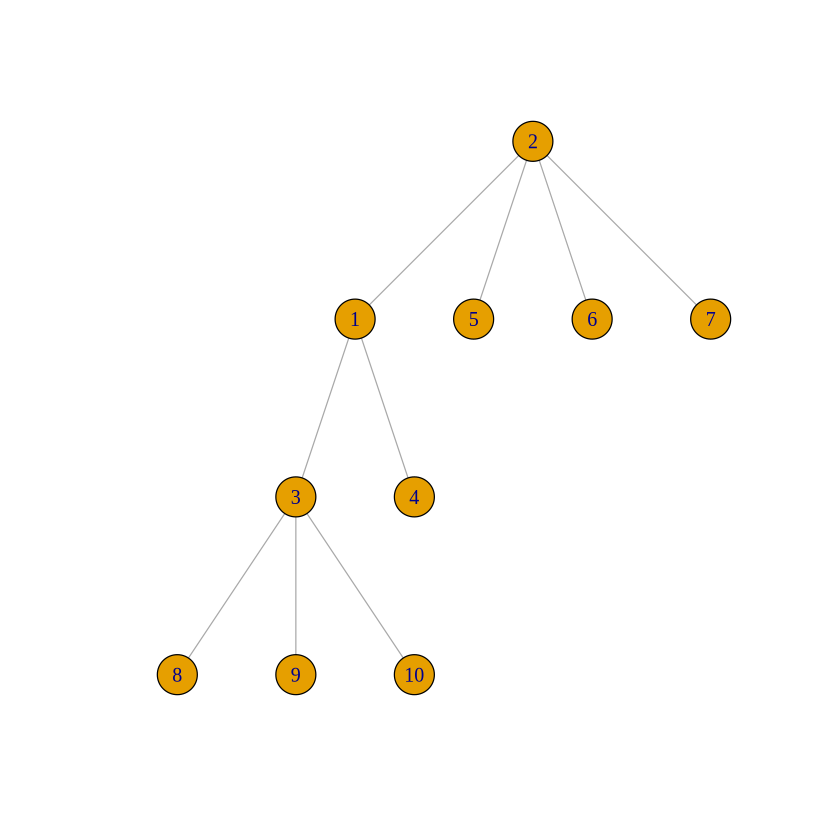

In [129]:
# TRÄDGRAF

# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("igraph")
    library(igraph)
   })

# Skapa en enkel trädgraf
tree <- make_tree(10, children = 3, mode = "undirected")

# Plot trädgrafen
plot(tree, layout=layout_as_tree)

})     
      
text <- 'En trädgraf är en typ av grafisk datastruktur som organiserar noder och kanter i en hierarkisk struktur som liknar ett träd i naturen. Varje nod representerar en punkt i grafen, och varje kant representerar en relation mellan noder. I en trädgraf har varje nod en överordnad nod (förutom rotnoden) och noll eller flera underordnade noder. Några viktiga egenskaper hos en trädgraf inkluderar: Rotnod (specifik nod i trädet som är rotens förälder och har inga föräldrar själv), Barnnod (noder som har en direkt förälder eller överordnad nod), Bladnoder (noder som inte har några barnnoder, vilket innebär att de är de yttersta noderna i trädet), Djup (antalet steg från rotnoden till en viss nod), Höjd (den längsta vägen från rotnoden till en lövnod). Trädgrafer är användbara för att modellera hierarkiska strukturer i data, såsom filsystem, organisationsträd, släktträd och många  andra tillämpningar. De tillåter också effektiv sökning, och hantering av data i en hierarkisk form.'
text

[1] "Ett vattenfallsdiagram är en typ av diagram som används för att visualisera och analysera förändringar i ett ekonomiskt resultat över en tidsperiod. Diagrammet visar de olika komponenterna som påverkar resultatet och hur de bidrar till att öka eller minska det totala resultatet. Vanligtvis används vattenfallsdiagram för att visualisera intäkter, kostnader och vinst eller förlust för olika perioder, såsom kvartal eller år. Det är särskilt användbart för att visa nettovinst eller förlust och hur olika faktorer påverkar denna siffra. En typisk uppdelning i ett vattenfallsdiagram kan inkludera följande komponenter: Startvärde (det ursprungliga värdet innan några förändringar har inträffat), Positiva bidrag (komponenter som bidrar till att öka det totala värdet, till exempel intäkter eller andra positiva resultat), Negativa bidrag (komponenter som minskar det totala värdet, till exempel kostnader eller andra negativa resultat), Nettovinst/förlust (det slutliga resultatet efter alla bidrag har beaktats). Vattenfallsdiagram ger en visuell representation av hur olika faktorer påverkar det ekonomiska resultatet och kan hjälpa beslutsfattare att förstå och analysera dessa förändringar mer effektivt."

ERROR: Error in value[[3L]](cond): Package ‘lattice’ version 0.21.9 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘lattice’ is imported by ‘zoo’, ‘hexbin’ so cannot be unloaded



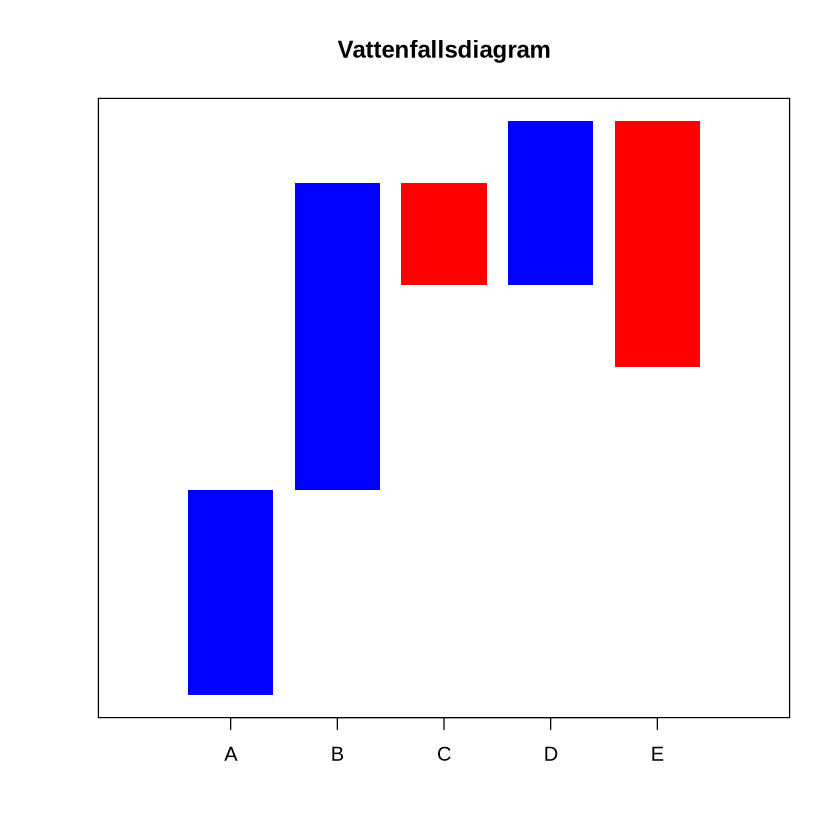

In [131]:
# VATTENFALLSDIAGRAM

text<- 'Ett vattenfallsdiagram är en typ av diagram som används för att visualisera och analysera förändringar i ett ekonomiskt resultat över en tidsperiod. Diagrammet visar de olika komponenterna som påverkar resultatet och hur de bidrar till att öka eller minska det totala resultatet. Vanligtvis används vattenfallsdiagram för att visualisera intäkter, kostnader och vinst eller förlust för olika perioder, såsom kvartal eller år. Det är särskilt användbart för att visa nettovinst eller förlust och hur olika faktorer påverkar denna siffra. En typisk uppdelning i ett vattenfallsdiagram kan inkludera följande komponenter: Startvärde (det ursprungliga värdet innan några förändringar har inträffat), Positiva bidrag (komponenter som bidrar till att öka det totala värdet, till exempel intäkter eller andra positiva resultat), Negativa bidrag (komponenter som minskar det totala värdet, till exempel kostnader eller andra negativa resultat), Nettovinst/förlust (det slutliga resultatet efter alla bidrag har beaktats). Vattenfallsdiagram ger en visuell representation av hur olika faktorer påverkar det ekonomiska resultatet och kan hjälpa beslutsfattare att förstå och analysera dessa förändringar mer effektivt.'
text

# Skapa enkelt vattenfallsdiagram i R_Base
categories <- c("A", "B", "C", "D", "E")
values <- c(10, 15, -5, 8, -12)

# Skapa vektor för stapelhöjder
y_bottom <- cumsum(c(0, head(values, -1)))
y_top <- cumsum(values)

# Skapa vattenfallsdiagrammet
plot(c(0, length(categories) + 1), range(c(y_bottom, y_top)), type = "n", 
     xaxt = "n", yaxt = "n", xlab = "", ylab = "", main = "Vattenfallsdiagram")

# Rita staplarna
for (i in 1:length(categories)) {
  rect(i - 0.4, y_bottom[i], i + 0.4, y_top[i], col = ifelse(values[i] > 0, "blue", "red"), border = NA)
}

# Rita x-axeln
axis(1, at = 1:length(categories), labels = categories)



# Dölj varningsmeddelanden och meddelanden vid start av paket
  suppressWarnings({
  suppressMessages({
    install.packages("lattice")
    library(lattice)
   })

# Exempeldata
data <- data.frame(
  Kategori = c("Intäkter", "Kostnad", "Nettoresultat"),
  Belopp = c(10000, -6000, 4000)
)

# Skapa vattenfallsdiagrammet
waterfallplot <- barchart(Kategori ~ Belopp, data = data,
                          origin = 0, 
                          auto.key = list(space = "right"),
                          main = "Vattenfallsdiagram",
                          ylab = "Belopp")

waterfallplot
})


[1] "Ett Venn-diagram är en typ av diagram som används för att visualisera relationer mellan olika datamängder. Det består av cirklar, där varje cirkel representerar en datamängd, och överlappningar mellan cirklarna indikerar gemensamma element mellan dessa datamängder. Vanligtvis används Venn-diagram för att visa hur olika grupper eller uppsättningar av data överlappar varandra. Det är ett användbart verktyg för att förstå gemensamma och unika element mellan olika kategorier eller grupper."

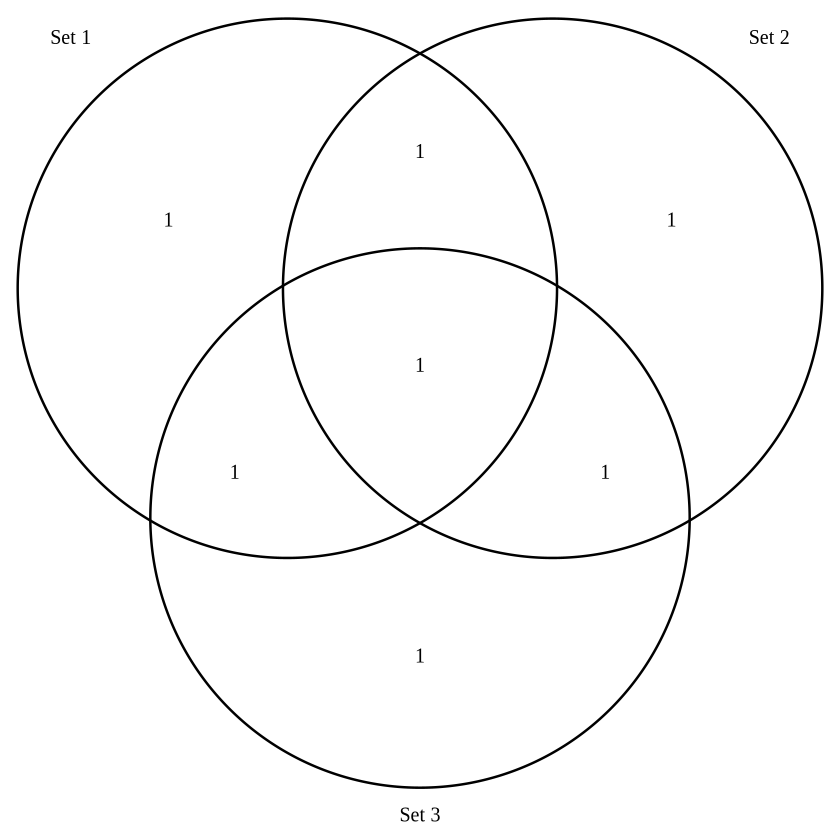

In [132]:
# VENNDIAGRAM

# Installera och ladda nödvändiga paket

suppressWarnings({
  suppressMessages({
    install.packages("VennDiagram")
    library(VennDiagram)
   })

# Skapa uppsättningar av data
set1 <- c("A", "B", "C", "D")
set2 <- c("B", "C", "E", "F")
set3 <- c("C", "D", "F", "G")

# Skapa Venn-diagram
venn.plot <- venn.diagram(
  x = list(set1 = set1, set2 = set2, set3 = set3),
  category.names = c("Set 1", "Set 2", "Set 3"),
  filename = NULL
)

# Visa Venn-diagrammet
grid.draw(venn.plot)
 })
text <- 'Ett Venn-diagram är en typ av diagram som används för att visualisera relationer mellan olika datamängder. Det består av cirklar, där varje cirkel representerar en datamängd, och överlappningar mellan cirklarna indikerar gemensamma element mellan dessa datamängder. Vanligtvis används Venn-diagram för att visa hur olika grupper eller uppsättningar av data överlappar varandra. Det är ett användbart verktyg för att förstå gemensamma och unika element mellan olika kategorier eller grupper.'
text

[1] "En violinplot är en typ av diagram som används för att visualisera fördelningen av en numerisk variabel för olika kategorier eller grupper. Det liknar en boxplot men ger mer information om datas fördelning.I en violinplot visas fördelningen av data som en violinformad figur. Den bredaste delen av violinfiguren representerar det område där majoriteten av observationerna ligger, medan de smalare delarna representerar områden med färre observationer. Centrala linjen inuti violinfiguren representerar medianvärdet. Ett violinplot kan också inkludera en boxplot i mitten av varje violinform. Boxplotten visar kvartilerna (25:e, 50:e och 75:e percentilen) samt eventuella outlier-värden. Detta ger ytterligare information om centrala mått och spridning för varje kategori eller grupp. Violinplot är användbara för att jämföra fördelningen av en variabel mellan olika grupper, särskilt när det finns flera grupper att  jämföra. De ger en tydlig visuell representation av fördelningsmönster och kan användas för att upptäcka skillnader och mönster i data."

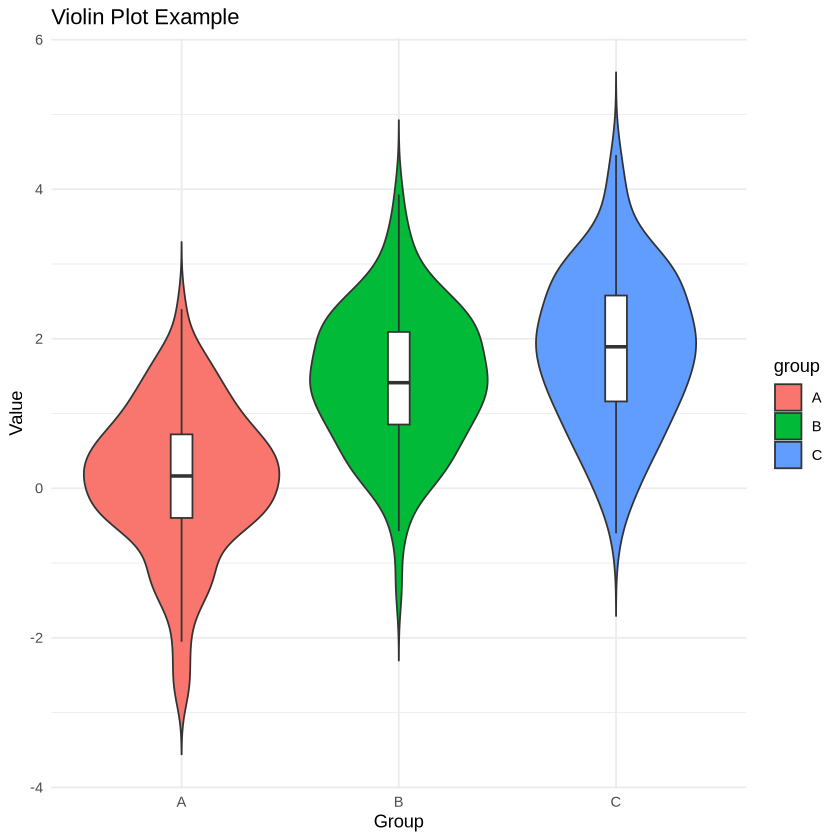

In [134]:
#VIOLIN PLOT

suppressWarnings({
  suppressMessages({
    install.packages("ggplot2")
    library(ggplot2)
   })

# Skapa en exempeldatamängd
data <- data.frame(
  group = rep(c("A", "B", "C"), each = 100),
  value = c(rnorm(100), rnorm(100, mean = 1.5), rnorm(100, mean = 2))
)

# Skapa violinplot med ggplot2
ggplot(data, aes(x = group, y = value, fill = group)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() +
  labs(title = "Violin Plot Example", x = "Group", y = "Value")
})
text <- 'En violinplot är en typ av diagram som används för att visualisera fördelningen av en numerisk variabel för olika kategorier eller grupper. Det liknar en boxplot men ger mer information om datas fördelning.I en violinplot visas fördelningen av data som en violinformad figur. Den bredaste delen av violinfiguren representerar det område där majoriteten av observationerna ligger, medan de smalare delarna representerar områden med färre observationer. Centrala linjen inuti violinfiguren representerar medianvärdet. Ett violinplot kan också inkludera en boxplot i mitten av varje violinform. Boxplotten visar kvartilerna (25:e, 50:e och 75:e percentilen) samt eventuella outlier-värden. Detta ger ytterligare information om centrala mått och spridning för varje kategori eller grupp. Violinplot är användbara för att jämföra fördelningen av en variabel mellan olika grupper, särskilt när det finns flera grupper att  jämföra. De ger en tydlig visuell representation av fördelningsmönster och kan användas för att upptäcka skillnader och mönster i data.'
text

Wordcloud

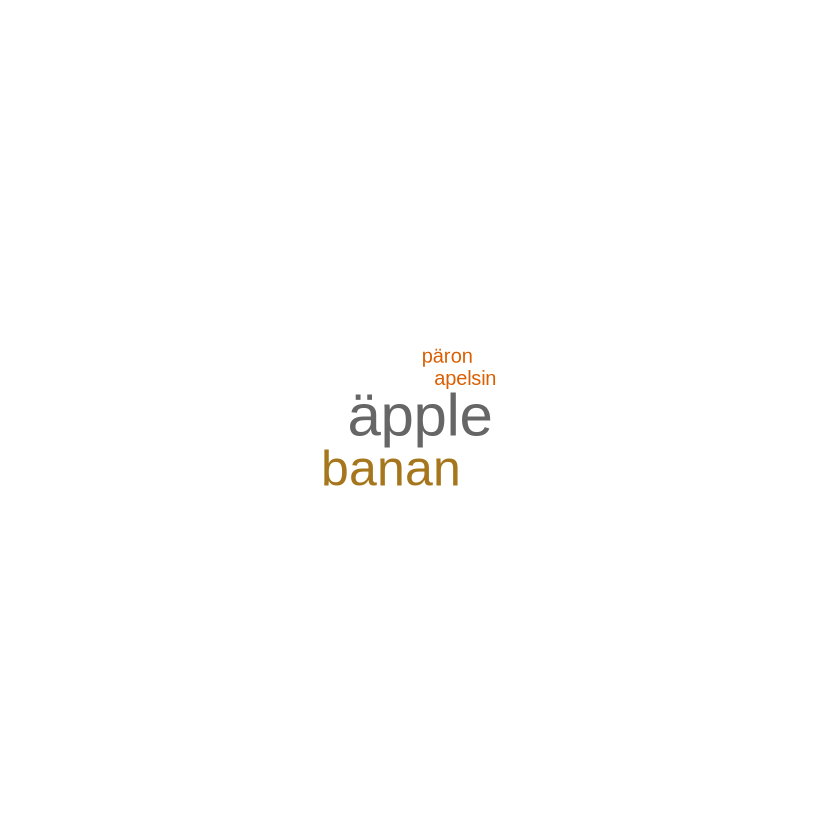

In [144]:
# WORDCLOUD

# Dölj varningsmeddelanden och meddelanden vid start av paket
suppressWarnings({
  suppressMessages({
    install.packages("wordcloud")
    library(wordcloud)
  })

  words <- c("banan", "äpple", "apelsin", "banan", "äpple", "banan", "päron", "banan", "äpple","äpple","äpple")
  word_freq <- table(words)

  # Skapa en wordcloud med titel och förstorad text
  wordcloud(words = names(word_freq), freq = word_freq, scale=c(3,0.5), min.freq = 1,
            colors=brewer.pal(8, "Dark2"), random.order=FALSE, rot.per=0.35, 
            use.r.layout=FALSE, fixed.asp=TRUE,
            main = "Wordcloud", cex.main = 10)
})

# Skriv ut rubriken
cat("Wordcloud")
